In [1]:
import sys
print(sys.version)
print(sys.executable)

3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
c:\Users\LOQ\Desktop\Graduation\venv\Scripts\python.exe


In [2]:

import torch
print("PyTorch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)


PyTorch version: 2.5.1+cu121
CUDA version: 12.1


In [3]:
# استدعاء المكتبات بعد تثبيتها
import gqlalchemy
import networkx as nx
import numpy as np
import scipy


In [4]:
from gqlalchemy import Memgraph
mg = Memgraph()

In [5]:

mg.execute("MATCH (n) DETACH DELETE n;")
print("Database cleaned.")

Database cleaned.


in powershell/terminal

docker cp "C:\Users\LOQ\Desktop\Graduation\alzkb-v2-0-0_memgraph.cypherl" memgraph:/tmp/alzkb-v2-0-0_memgraph.cypherl

docker start memgraph

docker ps

docker exec -i memgraph bash -c "mgconsole < /tmp/alzkb-v2-0-0_memgraph.cypherl"

docker exec -it memgraph mgconsole

MATCH (n) RETURN count(n);

memgraph> MATCH (n) RETURN count(n);
+----------+
| count(n) |
+----------+
| 234037   |
+----------+
1 row in set (round trip in 0.010 sec)

In [6]:
res = mg.execute_and_fetch("MATCH ()-[r]->() RETURN count(r) AS c;")
for r in res:
    print("عدد العلاقات في AlzKB =", r["c"])


عدد العلاقات في AlzKB = 1668487


In [7]:
#خلية 11
#أنواع العلاقات في ALZKB
res = mg.execute_and_fetch("""
MATCH ()-[r]->()
RETURN type(r) AS rel_type, count(*) AS count
ORDER BY count DESC;
""")

for r in res:
    print(r)

{'rel_type': 'GENEPARTICIPATESINBIOLOGICALPROCESS', 'count': 548285}
{'rel_type': 'GENEREGULATESGENE', 'count': 263978}
{'rel_type': 'GENEINPATHWAY', 'count': 178991}
{'rel_type': 'GENEINTERACTSWITHGENE', 'count': 147088}
{'rel_type': 'GENEHASMOLECULARFUNCTION', 'count': 104752}
{'rel_type': 'BODYPARTUNDEREXPRESSESGENE', 'count': 102185}
{'rel_type': 'BODYPARTOVEREXPRESSESGENE', 'count': 97772}
{'rel_type': 'GENEASSOCIATEDWITHCELLULARCOMPONENT', 'count': 88880}
{'rel_type': 'GENECOVARIESWITHGENE', 'count': 61606}
{'rel_type': 'CHEMICALBINDSGENE', 'count': 25726}
{'rel_type': 'CHEMICALDECREASESEXPRESSION', 'count': 21051}
{'rel_type': 'CHEMICALINCREASESEXPRESSION', 'count': 18713}
{'rel_type': 'TRANSCRIPTIONFACTORINTERACTSWITHGENE', 'count': 6910}
{'rel_type': 'DRUGINCLASS', 'count': 1945}
{'rel_type': 'GENEASSOCIATESWITHDISEASE', 'count': 508}
{'rel_type': 'SYMPTOMMANIFESTATIONOFDISEASE', 'count': 53}
{'rel_type': 'DISEASELOCALIZESTOANATOMY', 'count': 33}
{'rel_type': 'DRUGTREATSDISEAS

In [8]:
# خلية 12
# تحديد العقد المرتبطة بالألزهايمر (Disease + Pathway + غيرها)
query = """
MATCH (n)
WITH n, keys(n) AS ks
UNWIND ks AS k
WITH n, k, toString(n[k]) AS val
WHERE toLower(val) CONTAINS "alzheimer"
RETURN labels(n) AS labels, properties(n) AS props
LIMIT 50;
"""
for r in mg.execute_and_fetch(query):
    print(r)

{'labels': ['Pathway'], 'props': {'nodeID': '31951.0', 'pathwayId': 'R-HSA-8862803', 'pathwayName': "Deregulated CDK5 triggers multiple neurodegenerative pathways in Alzheimer's disease models", 'sourceDatabase': 'AOPDB - Reactome'}}
{'labels': ['Pathway'], 'props': {'nodeID': '29994.0', 'pathwayId': 'WP2059', 'pathwayName': 'Alzheimers Disease', 'sourceDatabase': 'AOPDB - Wikipathways'}}
{'labels': ['Pathway'], 'props': {'nodeID': '37722.0', 'pathwayId': 'p35alzheimerspathway', 'pathwayName': 'deregulation of cdk5 in alzheimers disease', 'sourceDatabase': 'AOPDB - BioCarta'}}
{'labels': ['Pathway'], 'props': {'nodeID': '37722.0', 'pathwayId': 'p35alzheimerspathway', 'pathwayName': 'deregulation of cdk5 in alzheimers disease', 'sourceDatabase': 'AOPDB - BioCarta'}}
{'labels': ['Pathway'], 'props': {'nodeID': '30103.0', 'pathwayId': 'path:hsa05010', 'pathwayName': 'Alzheimer,s disease', 'sourceDatabase': 'AOPDB - KEGG'}}
{'labels': ['Pathway'], 'props': {'nodeID': '29739.0', 'pathwayId'

In [9]:
# خلية 13
# حساب عدد العقد لكل label في AlzKB

query = """
MATCH (n)
UNWIND labels(n) AS lbl
RETURN lbl AS label, count(*) AS cnt
ORDER BY cnt DESC;
"""

for r in mg.execute_and_fetch(query):
    print(r)

{'label': 'Gene', 'cnt': 193279}
{'label': 'Drug', 'cnt': 16581}
{'label': 'BiologicalProcess', 'cnt': 12322}
{'label': 'Pathway', 'cnt': 4516}
{'label': 'MolecularFunction', 'cnt': 3460}
{'label': 'CellularComponent', 'cnt': 1695}
{'label': 'BodyPart', 'cnt': 652}
{'label': 'TranscriptionFactor', 'cnt': 519}
{'label': 'Symptom', 'cnt': 505}
{'label': 'DrugClass', 'cnt': 474}
{'label': 'Disease', 'cnt': 34}


In [10]:
# إعادة إنشاء الاتصال بوضوح
from gqlalchemy import Memgraph

mg = Memgraph(host="127.0.0.1", port=7687)

# فحص الاتصال بمحاولة تنفيذ أمر بسيط
try:
    mg.execute_and_fetch("RETURN 1;")
    print("✔ Memgraph is running and responding.")
except Exception as e:
    print("❌ Memgraph connection failed:", e)

✔ Memgraph is running and responding.


In [11]:
# خلية 14
# العقد الأكثر اتصالاً داخل الجراف (Top Degree Nodes)
query = """
MATCH (n)-[r]-()
WITH n, count(r) AS degree
RETURN labels(n) AS labels, n.nodeID AS id, degree
ORDER BY degree DESC
LIMIT 20;
"""

for r in mg.execute_and_fetch(query):
    print(r)

{'labels': ['BodyPart'], 'id': '233751.0', 'degree': 10946}
{'labels': ['BodyPart'], 'id': '233172.0', 'degree': 10637}
{'labels': ['Gene'], 'id': '7378.0', 'degree': 9129}
{'labels': ['BodyPart'], 'id': '233184.0', 'degree': 8821}
{'labels': ['BodyPart'], 'id': '233193.0', 'degree': 8742}
{'labels': ['BodyPart'], 'id': '233632.0', 'degree': 8172}
{'labels': ['BodyPart'], 'id': '233190.0', 'degree': 7984}
{'labels': ['BodyPart'], 'id': '233639.0', 'degree': 7190}
{'labels': ['BodyPart'], 'id': '233401.0', 'degree': 7043}
{'labels': ['BodyPart'], 'id': '233394.0', 'degree': 6838}
{'labels': ['BodyPart'], 'id': '231714.0', 'degree': 6788}
{'labels': ['BodyPart'], 'id': '233317.0', 'degree': 5790}
{'labels': ['BodyPart'], 'id': '233547.0', 'degree': 5769}
{'labels': ['BodyPart'], 'id': '233215.0', 'degree': 5717}
{'labels': ['BodyPart'], 'id': '233581.0', 'degree': 5357}
{'labels': ['BodyPart'], 'id': '233171.0', 'degree': 5306}
{'labels': ['BodyPart'], 'id': '233252.0', 'degree': 5219}
{

In [12]:
# خلية 15
# العقد ذات أعلى درجة اتصال
query = """
MATCH (n)-[r]-()
WITH n, count(r) AS deg
RETURN labels(n) AS labels, toString(n.name) AS name, toString(n.nodeID) AS nodeID, deg
ORDER BY deg DESC
LIMIT 20;
"""
for r in mg.execute_and_fetch(query):
    print(r)

{'labels': ['BodyPart'], 'name': None, 'nodeID': '233751.0', 'deg': 10946}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '233172.0', 'deg': 10637}
{'labels': ['Gene'], 'name': None, 'nodeID': '7378.0', 'deg': 9129}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '233184.0', 'deg': 8821}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '233193.0', 'deg': 8742}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '233632.0', 'deg': 8172}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '233190.0', 'deg': 7984}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '233639.0', 'deg': 7190}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '233401.0', 'deg': 7043}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '233394.0', 'deg': 6838}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '231714.0', 'deg': 6788}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '233317.0', 'deg': 5790}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '233547.0', 'deg': 5769}
{'labels': ['BodyPart'], 'name': None, 'no

In [13]:
# خلية 16
# جلب كل عقد Disease التي تحمل "alzheimer" في commonName
query = """
MATCH (d:Disease)
WHERE toLower(toString(d.commonName)) CONTAINS "alzheimer"
RETURN d.nodeID AS nodeID, d.commonName AS name, d.sourceDatabase AS source
LIMIT 100;
"""
for r in mg.execute_and_fetch(query):
    print(r)

{'nodeID': '233943.0', 'name': 'ALZHEIMER DISEASE 10', 'source': 'DisGeNET'}
{'nodeID': '31192.0', 'name': 'ALZHEIMER DISEASE 18', 'source': 'DisGeNET'}
{'nodeID': '234046.0', 'name': 'ALZHEIMER DISEASE 19', 'source': 'DisGeNET'}
{'nodeID': '34612.0', 'name': 'ALZHEIMER DISEASE 2', 'source': 'DisGeNET'}
{'nodeID': '33189.0', 'name': 'ALZHEIMER DISEASE 4', 'source': 'DisGeNET'}
{'nodeID': '234058.0', 'name': 'ALZHEIMER DISEASE 5', 'source': 'DisGeNET'}
{'nodeID': '233875.0', 'name': 'ALZHEIMER DISEASE 6, LATE-ONSET', 'source': 'DisGeNET'}
{'nodeID': '234210.0', 'name': 'ALZHEIMER DISEASE 9, SUSCEPTIBILITY TO', 'source': 'DisGeNET'}
{'nodeID': '234025.0', 'name': 'ALZHEIMER DISEASE, FAMILIAL, 1', 'source': 'DisGeNET'}
{'nodeID': '234066.0', 'name': 'ALZHEIMER DISEASE, FAMILIAL, 3, WITH SPASTIC PARAPARESIS', 'source': 'DisGeNET'}
{'nodeID': '234067.0', 'name': 'ALZHEIMER DISEASE, FAMILIAL, 3, WITH UNUSUAL PLAQUES', 'source': 'DisGeNET'}
{'nodeID': '234065.0', 'name': 'ALZHEIMER DISEASE, F

In [14]:
# خلية 17
# استخراج الجينات المرتبطة بعقد الألزهايمر
query = """
MATCH (d:Disease)
WHERE toLower(toString(d.commonName)) CONTAINS "alzheimer"
MATCH (d)-[:GENEASSOCIATEDWITHDISEASE|:GENEASSOCIATESWITHDISEASE]-(g:Gene)
RETURN toString(g.geneSymbol) AS gene, toString(g.geneName) AS name, count(*) AS hits
ORDER BY hits DESC
LIMIT 50;
"""
for r in mg.execute_and_fetch(query):
    print(r)

{'gene': 'APOE', 'name': None, 'hits': 7}
{'gene': 'PSEN1', 'name': None, 'hits': 7}
{'gene': 'PSEN2', 'name': None, 'hits': 6}
{'gene': 'ABCA7', 'name': None, 'hits': 6}
{'gene': 'PRNP', 'name': None, 'hits': 6}
{'gene': 'ADAM10', 'name': None, 'hits': 6}
{'gene': 'ABI3', 'name': None, 'hits': 5}
{'gene': 'CD33', 'name': None, 'hits': 5}
{'gene': 'ADAMTS1', 'name': None, 'hits': 5}
{'gene': 'HLA-DRB5', 'name': None, 'hits': 5}
{'gene': 'IGF1R', 'name': None, 'hits': 5}
{'gene': 'BCL2', 'name': None, 'hits': 5}
{'gene': 'MIR766', 'name': None, 'hits': 5}
{'gene': 'PLAU', 'name': None, 'hits': 5}
{'gene': 'DPYSL2', 'name': None, 'hits': 5}
{'gene': 'APP', 'name': None, 'hits': 5}
{'gene': 'CYP46A1', 'name': None, 'hits': 5}
{'gene': 'DHCR24', 'name': None, 'hits': 5}
{'gene': 'SLC30A4', 'name': None, 'hits': 5}
{'gene': 'EPHA1', 'name': None, 'hits': 5}
{'gene': 'CD2AP', 'name': None, 'hits': 5}
{'gene': 'MAOB', 'name': None, 'hits': 5}
{'gene': 'PCDH11X', 'name': None, 'hits': 5}
{'gen

In [15]:
# فحص خصائص عقد Drug
query = """
MATCH (d:Drug)
RETURN keys(d) AS props
LIMIT 5;
"""

for r in mg.execute_and_fetch(query):
    print(r)

{'props': ['nodeID', 'xrefCasRN', 'xrefDrugbank', 'commonName', 'sourceDatabase']}
{'props': ['nodeID', 'xrefCasRN', 'xrefDrugbank', 'commonName', 'sourceDatabase']}
{'props': ['nodeID', 'xrefCasRN', 'xrefDrugbank', 'commonName', 'sourceDatabase']}
{'props': ['nodeID', 'xrefCasRN', 'xrefDrugbank', 'commonName', 'sourceDatabase']}
{'props': ['nodeID', 'xrefCasRN', 'xrefDrugbank', 'commonName', 'sourceDatabase']}


In [16]:
# فحص وجود علاقات بين Drug و Gene
query = """
MATCH (d:Drug)-[r]-(g:Gene)
RETURN DISTINCT type(r) AS rel_type, count(*) AS c
ORDER BY c DESC;
"""
for r in mg.execute_and_fetch(query):
    print(r)

{'rel_type': 'CHEMICALBINDSGENE', 'c': 25726}
{'rel_type': 'CHEMICALDECREASESEXPRESSION', 'c': 21051}
{'rel_type': 'CHEMICALINCREASESEXPRESSION', 'c': 18713}


In [17]:
# خلية 18
# جلب الأدوية التي ترتبط/تؤثر على الجينات المرتبطة بالألزهايمر

query = """
MATCH (d:Disease)
WHERE toLower(toString(d.commonName)) CONTAINS "alzheimer"

MATCH (d)-[:GENEASSOCIATEDWITHDISEASE|:GENEASSOCIATESWITHDISEASE]-(g:Gene)

MATCH (drug:Drug)-[
        :CHEMICALBINDSGENE |
        :CHEMICALINCREASESEXPRESSION |
        :CHEMICALDECREASESEXPRESSION
    ]-(g)

RETURN DISTINCT
    toString(drug.commonName) AS drug_name,
    toString(drug.nodeID) AS drug_id,
    count(DISTINCT g) AS related_genes
ORDER BY related_genes DESC
LIMIT 50;
"""

for r in mg.execute_and_fetch(query):
    print(r)

{'drug_name': 'Zinc chloride', 'drug_id': '19794.0', 'related_genes': 13}
{'drug_name': 'Zinc acetate', 'drug_id': '19619.0', 'related_genes': 12}
{'drug_name': 'Zinc', 'drug_id': '8379.0', 'related_genes': 11}
{'drug_name': 'Menadione', 'drug_id': '434.0', 'related_genes': 10}
{'drug_name': 'Crizotinib', 'drug_id': '15463.0', 'related_genes': 9}
{'drug_name': 'Copper', 'drug_id': '14650.0', 'related_genes': 9}
{'drug_name': 'Varenicline', 'drug_id': '9152.0', 'related_genes': 9}
{'drug_name': 'Irinotecan', 'drug_id': '6240.0', 'related_genes': 8}
{'drug_name': 'Doxorubicin', 'drug_id': '5759.0', 'related_genes': 8}
{'drug_name': 'Raloxifene', 'drug_id': '3760.0', 'related_genes': 7}
{'drug_name': 'Topotecan', 'drug_id': '6730.0', 'related_genes': 7}
{'drug_name': 'Chlorpromazine', 'drug_id': '3731.0', 'related_genes': 7}
{'drug_name': 'Idarubicin', 'drug_id': '6142.0', 'related_genes': 7}
{'drug_name': 'Thioridazine', 'drug_id': '6518.0', 'related_genes': 7}
{'drug_name': 'Ponatinib',

In [18]:
# خلية 19
# حساب عدد العقد ضمن مسافة 1-2 hop من أمراض الألزهايمر
query = """
MATCH (d:Disease)
WHERE toLower(toString(d.commonName)) CONTAINS "alzheimer"
MATCH p=(d)-[*1..2]-(n)
RETURN count(DISTINCT n) AS nodes_within_2hops, count(p) AS path_count LIMIT 1;
"""
for r in mg.execute_and_fetch(query):
    print(r)

{'nodes_within_2hops': 20552, 'path_count': 190757}


In [19]:
import pandas as pd

# --- الجينات ---
q_genes = """
MATCH (d:Disease)
WHERE toLower(toString(d.commonName)) CONTAINS "alzheimer"
MATCH (d)-[:GENEASSOCIATEDWITHDISEASE|:GENEASSOCIATESWITHDISEASE]-(g:Gene)
RETURN DISTINCT toString(g.nodeID) AS nodeID,
                toString(g.geneSymbol) AS geneSymbol,
                toString(g.geneName) AS geneName;
"""

genes = list(mg.execute_and_fetch(q_genes))
df_genes = pd.DataFrame(genes)
df_genes.to_csv(r"C:\Users\LOQ\Desktop\Graduation\alz_genes_list.csv", index=False)

# --- الأدوية ---
q_drugs = """
MATCH (d:Disease)
WHERE toLower(toString(d.commonName)) CONTAINS "alzheimer"

MATCH (d)-[:GENEASSOCIATEDWITHDISEASE|:GENEASSOCIATESWITHDISEASE]-(g:Gene)

MATCH (drug:Drug)-[
        :CHEMICALBINDSGENE |
        :CHEMICALINCREASESEXPRESSION |
        :CHEMICALDECREASESEXPRESSION
    ]-(g)

RETURN DISTINCT
    toString(drug.nodeID) AS nodeID,
    toString(drug.commonName) AS drugName;
"""

drugs = list(mg.execute_and_fetch(q_drugs))
df_drugs = pd.DataFrame(drugs)
df_drugs.to_csv(r"C:\Users\LOQ\Desktop\Graduation\alz_drugs_list.csv", index=False)

print("تم تصدير", len(df_genes), "جين")
print("تم تصدير", len(df_drugs), "دواء")

تم تصدير 103 جين
تم تصدير 861 دواء


In [20]:
import mgclient
import pandas as pd
import json
from collections import defaultdict

gene_ids = df_genes["nodeID"].astype(str).tolist()
drug_ids = df_drugs["nodeID"].astype(str).tolist()

conn = mgclient.connect(host="127.0.0.1", port=7687)
cursor = conn.cursor()
print(" Connected to Memgraph")

drug_metadata = defaultdict(dict)
print(" Extracting drug metadata...")

for drug_id in drug_ids:

    cursor.execute("""
        MATCH (d:Drug {nodeID: $id})-[:HAS_CLASS]->(c:DrugClass)
        RETURN c.name
    """, {"id": drug_id})
    classes = [row[0] for row in cursor.fetchall()]
    cursor.execute("""
        MATCH (d:Drug {nodeID: $id})-[:INVOLVED_IN]->(p:Pathway)
        RETURN p.name
    """, {"id": drug_id})
    pathways = [row[0] for row in cursor.fetchall()]
    drug_metadata[drug_id] = {
        "classes": classes,
        "pathways": pathways
    }
print(f" Drug metadata extracted for {len(drug_metadata)} drugs")
with open(r"C:\Users\LOQ\Desktop\Graduation\drug_metadata.json", "w", encoding="utf-8") as f:
    json.dump(drug_metadata, f, indent=2, ensure_ascii=False)

print(" Saved drug_metadata.json")
gene_metadata = defaultdict(dict)
print(" Extracting gene metadata...")
for gene_id in gene_ids:
    cursor.execute("""
        MATCH (g:Gene {nodeID: $id})-[:INVOLVED_IN_BP]->(bp:BiologicalProcess)
        RETURN bp.name
    """, {"id": gene_id})
    bp = [row[0] for row in cursor.fetchall()]
    cursor.execute("""
        MATCH (g:Gene {nodeID: $id})-[:HAS_MF]->(mf:MolecularFunction)
        RETURN mf.name
    """, {"id": gene_id})
    mf = [row[0] for row in cursor.fetchall()]
    cursor.execute("""
        MATCH (g:Gene {nodeID: $id})-[:LOCATED_IN]->(cc:CellularComponent)
        RETURN cc.name
    """, {"id": gene_id})
    cc = [row[0] for row in cursor.fetchall()]
    gene_metadata[gene_id] = {
        "biological_processes": bp,
        "molecular_functions": mf,
        "cellular_components": cc
    }
print(f" Gene metadata extracted for {len(gene_metadata)} genes")
with open(r"C:\Users\LOQ\Desktop\Graduation\gene_metadata.json", "w", encoding="utf-8") as f:
    json.dump(gene_metadata, f, indent=2, ensure_ascii=False)
print(" Saved gene_metadata.json")

print(" Metadata generation completed successfully!")

 Connected to Memgraph
 Extracting drug metadata...
 Drug metadata extracted for 861 drugs
 Saved drug_metadata.json
 Extracting gene metadata...
 Gene metadata extracted for 103 genes
 Saved gene_metadata.json
 Metadata generation completed successfully!


In [21]:
# Cell 2 — Extract Alzheimer Disease nodes
alz_disease_query = """
MATCH (d:Disease)
WHERE toLower(toString(d.commonName)) CONTAINS "alzheimer"
RETURN DISTINCT d.nodeID AS nodeID;
"""

alz_disease_nodes = list(mg.execute_and_fetch(alz_disease_query))
print("Alzheimer Disease nodes found:", len(alz_disease_nodes))
alz_disease_nodes[:10]

Alzheimer Disease nodes found: 34


[{'nodeID': '233943.0'},
 {'nodeID': '31192.0'},
 {'nodeID': '234046.0'},
 {'nodeID': '34612.0'},
 {'nodeID': '33189.0'},
 {'nodeID': '234058.0'},
 {'nodeID': '233875.0'},
 {'nodeID': '234210.0'},
 {'nodeID': '234025.0'},
 {'nodeID': '234066.0'}]

In [22]:
# Cell 3 — Extract Alzheimer-associated genes
alz_genes_query = """
MATCH (d:Disease)
WHERE toLower(toString(d.commonName)) CONTAINS "alzheimer"
MATCH (d)-[:GENEASSOCIATEDWITHDISEASE|:GENEASSOCIATESWITHDISEASE]-(g:Gene)
RETURN DISTINCT g.nodeID AS nodeID, g.geneSymbol AS symbol;
"""

alz_genes = list(mg.execute_and_fetch(alz_genes_query))
print("Alzheimer Genes:", len(alz_genes))
alz_genes[:10]

Alzheimer Genes: 103


[{'nodeID': '1793.0', 'symbol': 'ADAM10'},
 {'nodeID': '3679.0', 'symbol': 'APOE'},
 {'nodeID': '21601.0', 'symbol': 'PSEN2'},
 {'nodeID': '2409.0', 'symbol': 'ND1'},
 {'nodeID': '2412.0', 'symbol': 'ND2'},
 {'nodeID': '241.0', 'symbol': 'ABCA7'},
 {'nodeID': '1994.0', 'symbol': 'DHCR24'},
 {'nodeID': '30274.0', 'symbol': 'ABI3'},
 {'nodeID': '23154.0', 'symbol': 'ADAMTS1'},
 {'nodeID': '6441.0', 'symbol': 'ATP5F1A'}]

In [23]:
# Cell 4 — Extract Alzheimer-related drugs
alz_drugs_query = """
MATCH (d:Disease)
WHERE toLower(toString(d.commonName)) CONTAINS "alzheimer"
MATCH (d)-[:GENEASSOCIATEDWITHDISEASE|:GENEASSOCIATESWITHDISEASE]-(g:Gene)
MATCH (drug:Drug)-[
        :CHEMICALBINDSGENE |
        :CHEMICALINCREASESEXPRESSION |
        :CHEMICALDECREASESEXPRESSION
    ]-(g)
RETURN DISTINCT drug.nodeID AS nodeID, drug.commonName AS name;
"""

alz_drugs = list(mg.execute_and_fetch(alz_drugs_query))
print("Alzheimer Drugs:", len(alz_drugs))
alz_drugs[:10]

Alzheimer Drugs: 861


[{'nodeID': '3882.0', 'name': 'Betamethasone'},
 {'nodeID': '15463.0', 'name': 'Crizotinib'},
 {'nodeID': '9274.0', 'name': 'Dexamethasone'},
 {'nodeID': '13557.0', 'name': 'Flunarizine'},
 {'nodeID': '3028.0', 'name': 'Fluocinolone acetonide'},
 {'nodeID': '5645.0', 'name': 'Fulvestrant'},
 {'nodeID': '6240.0', 'name': 'Irinotecan'},
 {'nodeID': '4475.0', 'name': 'Levonorgestrel'},
 {'nodeID': '434.0', 'name': 'Menadione'},
 {'nodeID': '4781.0', 'name': 'Mitomycin'}]

In [24]:
# Cell 5 — Build Alzheimer Subgraph node list
alz_nodes = set()

# Add disease nodes
for x in alz_disease_nodes:
    alz_nodes.add(x["nodeID"])

# Add gene nodes
for x in alz_genes:
    alz_nodes.add(x["nodeID"])

# Add drug nodes
for x in alz_drugs:
    alz_nodes.add(x["nodeID"])

print("Total Alzheimer subgraph nodes:", len(alz_nodes))

Total Alzheimer subgraph nodes: 998


In [25]:
# Cell 6 — Extract all edges from the graph
subgraph_edges_query = """
MATCH (a)-[r]-(b)
WHERE a.nodeID IS NOT NULL AND b.nodeID IS NOT NULL
RETURN DISTINCT toString(a.nodeID) AS src,
                type(r) AS rel,
                toString(b.nodeID) AS dst;
"""

edges = list(mg.execute_and_fetch(subgraph_edges_query))
print("Total edges fetched:", len(edges))
edges[:10]

Total edges fetched: 3336974


[{'src': '18028.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '702.0'},
 {'src': '14570.0', 'rel': 'DRUGINCLASS', 'dst': '4715.0'},
 {'src': '14570.0', 'rel': 'DRUGINCLASS', 'dst': '3678.0'},
 {'src': '14570.0', 'rel': 'DRUGINCLASS', 'dst': '4664.0'},
 {'src': '14570.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '1077.0'},
 {'src': '8285.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '2267.0'},
 {'src': '8285.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '3756.0'},
 {'src': '8285.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '10549.0'},
 {'src': '6349.0', 'rel': 'DRUGINCLASS', 'dst': '6932.0'},
 {'src': '6349.0', 'rel': 'DRUGINCLASS', 'dst': '812.0'}]

In [26]:
# Cell 7 — Keep only Alzheimer-related edges
filtered_edges = [
    e for e in edges
    if e["src"] in alz_nodes and e["dst"] in alz_nodes
]

print("Alzheimer Subgraph edges:", len(filtered_edges))
filtered_edges[:10]

Alzheimer Subgraph edges: 4232


[{'src': '19508.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '1199.0'},
 {'src': '19508.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '10555.0'},
 {'src': '10752.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '1199.0'},
 {'src': '5157.0', 'rel': 'CHEMICALDECREASESEXPRESSION', 'dst': '2331.0'},
 {'src': '9089.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '1199.0'},
 {'src': '8252.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '4948.0'},
 {'src': '4579.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '1199.0'},
 {'src': '7317.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '60.0'},
 {'src': '7317.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '3449.0'},
 {'src': '7317.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '4349.0'}]

In [27]:
# Cell 8 — Build graph using NetworkX
import networkx as nx

G = nx.Graph()

# Add nodes
G.add_nodes_from(list(alz_nodes))

# Add edges
for e in filtered_edges:
    G.add_edge(e["src"], e["dst"])

print("Graph built:")
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())

Graph built:
Nodes: 998
Edges: 2111


In [28]:
# Cell 9 — Compute basic node features (degree)
import pandas as pd

features = []

for node in G.nodes():
    features.append({
        "nodeID": node,
        "degree": G.degree(node)
    })

df_features = pd.DataFrame(features)
df_features.head()

,nodeID,degree
0,5664.0,2
1,22026.0,1
2,4681.0,1
3,20711.0,1
4,5114.0,1


In [29]:
# Cell 10 — Fetch node labels for each nodeID
def get_label(node_id):
    q = f"""
    MATCH (n {{nodeID: '{node_id}'}})
    RETURN labels(n) AS lbl
    LIMIT 1;
    """
    res = list(mg.execute_and_fetch(q))
    if res:
        return res[0]["lbl"][0]  # first label
    return "Unknown"

df_features["label"] = df_features["nodeID"].apply(get_label)
df_features.head()

,nodeID,degree,label
0,5664.0,2,Drug
1,22026.0,1,Drug
2,4681.0,1,Drug
3,20711.0,1,Drug
4,5114.0,1,Drug


In [30]:
# Cell 11 — One-hot encode the node labels
df_features = pd.get_dummies(df_features, columns=["label"])
df_features.head()

,nodeID,degree,label_Disease,label_Drug,label_Gene
0,5664.0,2,False,True,False
1,22026.0,1,False,True,False
2,4681.0,1,False,True,False
3,20711.0,1,False,True,False
4,5114.0,1,False,True,False


In [31]:
# Cell 12 — Node embeddings (DeepWalk using gensim)

# 1️⃣ استيراد المكتبات
import networkx as nx
import random
from gensim.models import Word2Vec

# 2️⃣ إعداد الـ graph (G) مسبقاً يجب أن يكون موجود
# مثال: G = nx.read_edgelist("your_graph.edgelist")  # أو Graph جاهز بالفعل

# 3️⃣ إعداد random walks
def generate_random_walks(graph, num_walks=10, walk_length=80):
    walks = []
    nodes = list(graph.nodes())
    for _ in range(num_walks):
        random.shuffle(nodes)
        for node in nodes:
            walk = [str(node)]
            current = node
            for _ in range(walk_length - 1):
                neighbors = list(graph.neighbors(current))
                if neighbors:
                    current = random.choice(neighbors)
                    walk.append(str(current))
                else:
                    break
            walks.append(walk)
    return walks

walks = generate_random_walks(G, num_walks=10, walk_length=80)

# 4️⃣ تدريب Word2Vec model على random walks
embedding_model = Word2Vec(
    sentences=walks,
    vector_size=128,   # حجم الـ embedding لكل node
    window=10,         # حجم السياق
    min_count=1,
    sg=1,              # استخدام Skip-Gram
    workers=4,
    epochs=5
)

# 5️⃣ استخراج الـ embeddings لكل node
embeddings = {str(node): embedding_model.wv[str(node)] for node in G.nodes()}

# 6️⃣ مثال على طباعة embeddings لثلاثة nodes
for i, node in enumerate(list(G.nodes())[:3]):
    print(f"Node {node}: {embeddings[str(node)][:10]} ...")  # أول 10 قيم فقط

Node 5664.0: [-0.04200597  0.16057843 -0.12580642  0.10925916 -0.00866327 -0.07603504
 -0.00524475  0.11407097 -0.01178422  0.1627089 ] ...
Node 22026.0: [ 0.09950615  0.04819006 -0.20374028  0.24326347  0.15336312 -0.12155069
 -0.05674088  0.19741689  0.0804812   0.06364737] ...
Node 4681.0: [-0.07136505  0.27578038 -0.07278571  0.12161952  0.17447652 -0.09147792
  0.11519767  0.18074454  0.1230459   0.01093445] ...


In [32]:
# Cell 13 — Convert Embeddings to DataFrame
import pandas as pd
import numpy as np

# تحويل dictionary للـ embeddings إلى DataFrame
embed_df = pd.DataFrame({
    "nodeID": list(embeddings.keys()),
    # تحويل كل numpy array إلى list ليتم تخزينها بسهولة في DataFrame
    "embedding": [embeddings[n].tolist() for n in embeddings]
})

embed_df.head()

,nodeID,embedding
0,5664.0,"[-0.04200597479939461, 0.1605784296989441, -0...."
1,22026.0,"[0.09950614720582962, 0.04819006472826004, -0...."
2,4681.0,"[-0.07136505097150803, 0.2757803797721863, -0...."
3,20711.0,"[0.19869759678840637, -0.33957427740097046, 0...."
4,5114.0,"[-0.18012385070323944, -0.1739782989025116, 0...."


In [33]:
# Cell 14 — Merge Features + Embeddings
# التأكد أن df_features موجود مسبقًا ويحتوي على nodeID
merged = df_features.merge(embed_df, on="nodeID", how="left")

# التأكد من عدم وجود قيم مفقودة بعد الدمج
missing_nodes = merged[merged['embedding'].isnull()]
if not missing_nodes.empty:
    print(f"⚠ Warning: {len(missing_nodes)} nodes have no embeddings!")

merged.head()

,nodeID,degree,label_Disease,label_Drug,label_Gene,embedding
0,5664.0,2,False,True,False,"[-0.04200597479939461, 0.1605784296989441, -0...."
1,22026.0,1,False,True,False,"[0.09950614720582962, 0.04819006472826004, -0...."
2,4681.0,1,False,True,False,"[-0.07136505097150803, 0.2757803797721863, -0...."
3,20711.0,1,False,True,False,"[0.19869759678840637, -0.33957427740097046, 0...."
4,5114.0,1,False,True,False,"[-0.18012385070323944, -0.1739782989025116, 0...."


In [34]:
save_path = r"C:\Users\LOQ\Desktop\Graduation"

merged.to_pickle(save_path + "alz_features.pkl")
embed_df.to_pickle(save_path + "alz_embeddings.pkl")
df_features.to_csv(save_path + "alz_node_features.csv", index=False)

print("✔ Feature Engineering: All files saved successfully.")

✔ Feature Engineering: All files saved successfully.


In [35]:
# Cell 1 — Expand embeddings into numeric feature columns

# DeepWalk embeddings currently stored as lists → convert to matrix
embed_expanded = embed_df["embedding"].apply(pd.Series)
embed_expanded.columns = [f"emb_{i}" for i in range(embed_expanded.shape[1])]

# Append nodeID to allow merging
embed_expanded["nodeID"] = embed_df["nodeID"]

embed_expanded.head()

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_119,emb_120,emb_121,emb_122,emb_123,emb_124,emb_125,emb_126,emb_127,nodeID
0,-0.042006,0.160578,-0.125806,0.109259,-0.008663,-0.076035,-0.005245,0.114071,-0.011784,0.162709,...,0.228630,0.041227,-0.015052,-0.191707,-0.114516,0.081064,-0.226196,0.030409,0.136867,5664.0
1,0.099506,0.048190,-0.203740,0.243263,0.153363,-0.121551,-0.056741,0.197417,0.080481,0.063647,...,-0.222686,0.107398,-0.184612,-0.163895,-0.151251,0.473557,0.140569,0.005767,0.127922,22026.0
2,-0.071365,0.275780,-0.072786,0.121620,0.174477,-0.091478,0.115198,0.180745,0.123046,0.010934,...,0.046388,0.168428,-0.487289,0.085794,-0.171566,0.317430,0.132967,0.052625,0.212636,4681.0
3,0.198698,-0.339574,0.257232,0.120255,0.135609,-0.261410,0.038864,0.137480,-0.012098,0.190039,...,-0.226710,-0.068533,-0.119254,-0.101390,0.048831,0.218772,0.161171,0.031721,0.194162,20711.0
4,-0.180124,-0.173978,0.137639,0.381596,-0.076436,-0.123915,-0.095176,-0.355404,0.363220,0.065193,...,-0.178757,0.065059,-0.224235,-0.054188,0.079521,-0.006155,0.430595,0.324667,-0.105947,5114.0


In [36]:
# Cell 2 — Merge df_features with expanded embeddings

full_df = df_features.merge(embed_expanded, on="nodeID")
full_df.head()

,nodeID,degree,label_Disease,label_Drug,label_Gene,emb_0,emb_1,emb_2,emb_3,emb_4,...,emb_118,emb_119,emb_120,emb_121,emb_122,emb_123,emb_124,emb_125,emb_126,emb_127
0,5664.0,2,False,True,False,-0.042006,0.160578,-0.125806,0.109259,-0.008663,...,-0.065726,0.228630,0.041227,-0.015052,-0.191707,-0.114516,0.081064,-0.226196,0.030409,0.136867
1,22026.0,1,False,True,False,0.099506,0.048190,-0.203740,0.243263,0.153363,...,-0.000716,-0.222686,0.107398,-0.184612,-0.163895,-0.151251,0.473557,0.140569,0.005767,0.127922
2,4681.0,1,False,True,False,-0.071365,0.275780,-0.072786,0.121620,0.174477,...,-0.053142,0.046388,0.168428,-0.487289,0.085794,-0.171566,0.317430,0.132967,0.052625,0.212636
3,20711.0,1,False,True,False,0.198698,-0.339574,0.257232,0.120255,0.135609,...,-0.093973,-0.226710,-0.068533,-0.119254,-0.101390,0.048831,0.218772,0.161171,0.031721,0.194162
4,5114.0,1,False,True,False,-0.180124,-0.173978,0.137639,0.381596,-0.076436,...,0.048890,-0.178757,0.065059,-0.224235,-0.054188,0.079521,-0.006155,0.430595,0.324667,-0.105947


In [37]:
# Cell 3 — Convert node features into PyTorch tensor
import torch
import numpy as np

# Exclude nodeID and labels to build the feature matrix X
feature_cols = [col for col in full_df.columns
                if col not in ["nodeID", "label_Disease", "label_Drug", "label_Gene"]]

x = torch.tensor(full_df[feature_cols].values, dtype=torch.float)

x.shape

torch.Size([998, 129])

In [38]:
# Cell 4 — Build label vector y for node classification

# Convert one-hot labels into a single integer class
full_df["label"] = full_df[["label_Disease", "label_Drug", "label_Gene"]].idxmax(axis=1)
full_df["label"] = full_df["label"].map({
    "label_Disease": 0,
    "label_Drug": 1,
    "label_Gene": 2
})

y = torch.tensor(full_df["label"].values, dtype=torch.long)

y.shape

torch.Size([998])

In [39]:
# Cell 5 — Create node index mapping (string IDs → integer IDs)

# Create mapping from nodeID to integer index
node_to_idx = {node: idx for idx, node in enumerate(full_df["nodeID"])}

# (optional) reverse mapping if needed later
idx_to_node = {idx: node for node, idx in node_to_idx.items()}

len(node_to_idx)

998

In [40]:
# Cell 6 — Create edge_index tensor using node index mapping

edges = []
for src, dst in G.edges():
    edges.append([node_to_idx[src], node_to_idx[dst]])

edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

edge_index.shape

torch.Size([2, 2111])

In [41]:
import torch_geometric
from torch_geometric.data import Data
print("✔ PyTorch Geometric installed successfully!")


c:\Users\LOQ\Desktop\Graduation\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✔ PyTorch Geometric installed successfully!


In [42]:
# Cell 7 — Build the full Data object

from torch_geometric.data import Data
import torch
num_edges = edge_index.size(1)
edge_type = torch.zeros(num_edges, dtype=torch.long)

data = Data(
    x=x,
    edge_index=edge_index,
    edge_type=edge_type,
    y=y
)
print(data)

Data(x=[998, 129], edge_index=[2, 2111], y=[998], edge_type=[2111])


In [43]:
#Cell 8 — Save the Prepared Graph Data
import torch

torch.save(data, r"C:\Users\LOQ\Desktop\Graduation\alz_graph_data.pt")

In [44]:
# Phase 3.1 — Cell 1
# Define positive Drug–Gene relations

RELATION_MAP = {
    "CHEMICALBINDSGENE": 1,
    "CHEMICALINCREASESEXPRESSION": 2,
    "CHEMICALDECREASESEXPRESSION": 3
}

In [45]:
positive_edges_with_labels = []
for edge in filtered_edges:
    rel_name = edge["rel"]
    if rel_name in RELATION_MAP:
        src, dst = edge["src"], edge["dst"]
        label = RELATION_MAP[rel_name]

        src_label = get_label(src)
        dst_label = get_label(dst)

        # توحيد الاتجاه: دواء -> جين
        if src_label == "Drug" and dst_label == "Gene":
            positive_edges_with_labels.append(((src, dst), label))
        elif src_label == "Gene" and dst_label == "Drug":
            positive_edges_with_labels.append(((dst, src), label))

print(f"Total positive samples: {len(positive_edges_with_labels)}")
from collections import Counter
counts = Counter([item[1] for item in positive_edges_with_labels])
print("Distribution (1: Binds, 2: Increases, 3: Decreases):")
print(dict(counts))

Total positive samples: 2930
Distribution (1: Binds, 2: Increases, 3: Decreases):
{1: 2166, 3: 248, 2: 516}


In [46]:
# Phase 4 — Cell 3

import random

existing_positive_pairs = set([pair for pair, label in positive_edges_with_labels])

drug_nodes = df_features[df_features["label_Drug"]]["nodeID"].tolist()
gene_nodes = df_features[df_features["label_Gene"]]["nodeID"].tolist()

negative_samples = []
target_count = len(positive_edges_with_labels)

while len(negative_samples) < target_count:
    d = random.choice(drug_nodes)
    g = random.choice(gene_nodes)
    if (d, g) not in existing_positive_pairs:
        negative_samples.append(((d, g), 0))
negative_samples = list(set(negative_samples))
print("Negative samples (Class 0):", len(negative_samples))

Negative samples (Class 0): 2879


In [47]:
import torch
import networkx as nx

G_nx = nx.Graph()
G_nx.add_nodes_from(range(data.num_nodes))
G_nx.add_edges_from(data.edge_index.t().tolist())
deg = torch.tensor(
    [G_nx.degree(n) for n in range(data.num_nodes)],
    dtype=torch.float
).unsqueeze(1)
norm_deg = (deg - deg.mean()) / (deg.std() + 1e-9)
pr = nx.pagerank(G_nx)
pagerank = torch.tensor(
    [pr[n] for n in range(data.num_nodes)],
    dtype=torch.float
).unsqueeze(1)
data.x = torch.cat([data.x, norm_deg, pagerank], dim=1)
print("✔ New feature dimension:", data.x.shape) 
save_path = r"C:\Users\LOQ\Desktop\Graduation\\"
torch.save(data, save_path + "alz_raw_tensors.pt")

print(" alz_raw_tensors.pt saved with REAL features")

✔ New feature dimension: torch.Size([998, 131])
 alz_raw_tensors.pt saved with REAL features


In [48]:
# Phase 3.3 — Cell 1
# Helper function to get node embedding

def get_embedding(node_id):
    row = embed_expanded[embed_expanded["nodeID"] == node_id]
    return row.drop(columns=["nodeID"]).values[0]

In [49]:
# Phase 3.3 — Cell 2
# Build edge-level feature matrix

import numpy as np

X_multi = []
y_multi = []
#  معالجة العينات الإيجابية (الفئات: 1، 2، 3)
# نستخدم القائمة التي أنشأناها في Phase 4 Cell 2
for (d, g), label in positive_edges_with_labels:
    emb_d = get_embedding(d)
    emb_g = get_embedding(g)
    X_multi.append(np.concatenate([emb_d, emb_g]))
    y_multi.append(label)

#  معالجة العينات السلبية (الفئة: 0)
# نستخدم القائمة التي أنشأناها في Phase 4 Cell 3
for (d, g), label in negative_samples:
    emb_d = get_embedding(d)
    emb_g = get_embedding(g)
    X_multi.append(np.concatenate([emb_d, emb_g]))
    y_multi.append(label)

X_multi = np.array(X_multi)
y_multi = np.array(y_multi)

print(" Multi-class Feature Matrix Built")
print("X_multi shape:", X_multi.shape)
print("y_multi shape:", y_multi.shape)

# التأكد من توزيع الفئات
unique, counts = np.unique(y_multi, return_counts=True)
print("Classes distribution (0:None, 1:Binds, 2:Increases, 3:Decreases):")
print(dict(zip(unique, counts)))

 Multi-class Feature Matrix Built
X_multi shape: (5809, 256)
y_multi shape: (5809,)
Classes distribution (0:None, 1:Binds, 2:Increases, 3:Decreases):
{0: 2879, 1: 2166, 2: 516, 3: 248}


In [50]:
import random
import numpy as np
from sklearn.model_selection import train_test_split

#  تجميع كل العينات مع تسمياتها الصحيحة (0، 1، 2، 3)
# استخدمنا القوائم التي جهزناها سابقاً في الخطوات الماضية
all_samples = positive_edges_with_labels + negative_samples

random.shuffle(all_samples)

#  فصل الحواف (edges) عن التسميات (labels)
edges_list = [item[0] for item in all_samples]
labels_list = [item[1] for item in all_samples]

#  تقسيم البيانات باستخدام Stratify لضمان توزيع الفئات بشكل عادل
# تقسيم 20% للاختبار
train_val_edges, test_edges, train_val_labels, test_labels = train_test_split(
    edges_list, labels_list, test_size=0.2, random_state=42, stratify=labels_list
)

train_edges, val_edges, train_labels, val_labels = train_test_split(
    train_val_edges, train_val_labels, test_size=0.125, random_state=42, stratify=train_val_labels
)

#  بناء الميزات (X) لكل مجموعة
def build_features_multi(edges):
    X = []
    for d, g in edges:
        X.append(np.concatenate([get_embedding(d), get_embedding(g)]))
    return np.array(X)

X_train, y_train = build_features_multi(train_edges), np.array(train_labels)
X_val,   y_val   = build_features_multi(val_edges),   np.array(val_labels)
X_test,  y_test  = build_features_multi(test_edges),  np.array(test_labels)

print(" Multi-class Split Completed ")
print("X_train shape:", X_train.shape, "| Classes:", np.unique(y_train, return_counts=True))
print("X_val shape:", X_val.shape,   "| Classes:", np.unique(y_val, return_counts=True))
print("X_test shape:", X_test.shape, "| Classes:", np.unique(y_test, return_counts=True))

 Multi-class Split Completed 
X_train shape: (4066, 256) | Classes: (array([0, 1, 2, 3]), array([2015, 1516,  362,  173], dtype=int64))
X_val shape: (581, 256) | Classes: (array([0, 1, 2, 3]), array([288, 217,  51,  25], dtype=int64))
X_test shape: (1162, 256) | Classes: (array([0, 1, 2, 3]), array([576, 433, 103,  50], dtype=int64))


In [51]:
import torch

device = torch.device("cpu")

X_train_tensor = torch.tensor(X_train, dtype=torch.float).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)

X_val_tensor = torch.tensor(X_val, dtype=torch.float).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

print(f"✔ Tensors are ready on device: {device}")

✔ Tensors are ready on device: cpu


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rcParams["font.family"] = "DejaVu Sans"

In [53]:
import torch
import torch.nn.functional as F

class MultiClassFocalLoss(torch.nn.Module):
    def __init__(self, gamma=2, weight=None):
        super(MultiClassFocalLoss, self).__init__()
        self.gamma = gamma

        # هذا السطر الجديد 🔑
        if weight is not None:
            self.register_buffer("weight", weight)  # ينقل تلقائيًا على CPU/GPU مع الـ module
        else:
            self.weight = None

    def forward(self, logits, targets):
        # logits: [N, 4] (مخرجات الشبكة لكل فئة)
        # targets: [N] (الأرقام 0، 1، 2، 3)
        ce_loss = F.cross_entropy(logits, targets, reduction='none', weight=self.weight)
        # حساب الاحتمالية pt
        pt = torch.exp(-ce_loss)
        # تطبيق معادلة Focal Loss للمصنف المتعدد
        focal_loss = ((1 - pt) ** self.gamma * ce_loss).mean()
        return focal_loss

# حساب الأوزان أولاً (لأن الفئة 3 عددها قليل جداً مقارنة بالفئة 0)
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

y_train_cpu = y_train_tensor.cpu().numpy()
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_cpu), y=y_train_cpu)
weights_tensor = torch.tensor(weights, dtype=torch.float).to(device)

# تعريف المعيار (Criterion) الجديد
criterion = MultiClassFocalLoss(gamma=2, weight=weights_tensor)
criterion = criterion.to(device)  # بس للتأكيد، الآن ينقل weight تلقائيًا
print(f"✔ Multi-Class Focal Loss ready with class weights: {weights}")

✔ Multi-Class Focal Loss ready with class weights: [0.5044665  0.67051451 2.80801105 5.87572254]


In [54]:
from torch_geometric.nn import RGCNConv, RGATConv
import torch.nn as nn
import torch.nn.functional as F

in_dim = data.x.size(1) # 131
hidden_dim = 256  # رفعنا السعة من 128 إلى 256
num_classes = 4
num_relations = 1
heads = 4

#  RGCN 

class Advanced_RGCN(nn.Module):
    def __init__(self, in_dim, hidden_dim, num_classes, num_rel):
        super().__init__()
        self.conv1 = RGCNConv(in_dim, hidden_dim, num_rel)
        self.conv2 = RGCNConv(hidden_dim, hidden_dim, num_rel)
        
        self.ln1 = nn.LayerNorm(hidden_dim)
        self.ln2 = nn.LayerNorm(hidden_dim)
        self.dropout = nn.Dropout(0.3)

        self.edge_mlp = nn.Sequential(
            nn.Linear(2 * hidden_dim, hidden_dim),
            nn.GELU(), # GELU أفضل من ReLU في هذه المهام
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.GELU(),
            nn.Linear(hidden_dim // 2, num_classes)
        )

    def encode(self, x, edge_index, edge_type):
        h1 = self.conv1(x, edge_index, edge_type)
        h1 = self.ln1(torch.relu(h1))
        h1 = self.dropout(h1)
        
        h2 = self.conv2(h1, edge_index, edge_type)
        h2 = self.ln2(torch.relu(h2))
        
        return h1 + h2 

    def decode(self, h, edges):
        src = h[edges[:, 0]]
        dst = h[edges[:, 1]]
        z = torch.cat([src, dst], dim=1)
        return self.edge_mlp(z)


#  RGAT

class Advanced_RGAT(nn.Module):
    def __init__(self, in_dim, hidden_dim, num_classes, num_rel, heads=4):
        super().__init__()
        # استخدام Multi-head
        self.conv1 = RGATConv(in_dim, hidden_dim // heads, num_rel, heads=heads)
        self.conv2 = RGATConv(hidden_dim, hidden_dim // heads, num_rel, heads=heads)
        
        self.ln1 = nn.LayerNorm(hidden_dim)
        self.ln2 = nn.LayerNorm(hidden_dim)
        self.dropout = nn.Dropout(0.3)

        self.edge_mlp = nn.Sequential(
            nn.Linear(2 * hidden_dim, hidden_dim),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, num_classes)
        )

    def encode(self, x, edge_index, edge_type):
        h1 = self.conv1(x, edge_index, edge_type)
        h1 = self.ln1(torch.relu(h1))
        h1 = self.dropout(h1)
        
        h2 = self.conv2(h1, edge_index, edge_type)
        h2 = self.ln2(torch.relu(h2))
        
        return h1 + h2

    def decode(self, h, edges):
        src = h[edges[:, 0]]
        dst = h[edges[:, 1]]
        z = torch.cat([src, dst], dim=1)
        return self.edge_mlp(z)


rgcn_multi = Advanced_RGCN(in_dim, hidden_dim, num_classes, num_relations).to(device)
rgat_multi = Advanced_RGAT(in_dim, hidden_dim, num_classes, num_relations, heads=heads).to(device)

print("Advanced Architectures Ready: Deepened MLPs, Residual Connections, and Multi-head Attention.")

Advanced Architectures Ready: Deepened MLPs, Residual Connections, and Multi-head Attention.


In [55]:
import torch
import torch.nn.functional as F
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report

def evaluate_edges_multiclass(model, h, edge_pairs, labels, criterion):
    """
    labels: tensor [num_edges] (يحتوي على القيم 0, 1, 2, 3)
    """
    model.eval()
    with torch.no_grad():
        #  الحصول على المخرجات (Logits) بحجم [N, 4]
        logits = model.decode(h, edge_pairs)
        #  تحويل المخرجات إلى احتمالات باستخدام Softmax
        probs = F.softmax(logits, dim=1)
        # اختيار الفئة ذات الاحتمالية الأعلى للتنبؤ
        preds = torch.argmax(logits, dim=1)
        #  حساب الخسارة (Labels هنا يجب أن تكون Long وليس Float)
        loss = criterion(logits, labels).item()
        # الحسابات الإحصائية
        acc = accuracy_score(labels.cpu(), preds.cpu())
        f1  = f1_score(labels.cpu(), preds.cpu(), average='macro')
        #  AUC للمصنف المتعدد (طريقة One-vs-Rest)
        try:
            auc = roc_auc_score(labels.cpu(), probs.cpu(), multi_class='ovr', average='macro')
        except:
            auc = 0.0
    return loss, acc, f1, auc

class EarlyStopper:
    def __init__(self, patience=40):
        self.best_f1 = -1
        self.patience = patience
        self.counter = 0
        self.best_state = None

    def step(self, f1, model):
        if f1 > self.best_f1:
            self.best_f1 = f1
            self.counter = 0
            self.best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
        else:
            self.counter += 1

        return self.counter >= self.patience

print("Multi-class Metrics and EarlyStopper are ready.")

Multi-class Metrics and EarlyStopper are ready.


In [56]:
def train_multiclass_predictor(model, data,
                               train_edges_tensor, y_train_tensor,
                               val_edges_tensor,   y_val_tensor,
                               lr=0.001, wd=1e-4, epochs=300):

    opt = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
    stopper = EarlyStopper(patience=50)
    
    # قوائم لحفظ قيم التدريب للرسم البياني
    train_losses = []
    val_losses = []
    train_f1_scores = []
    val_f1_scores = []

    for ep in range(1, epochs + 1):
        model.train()
        opt.zero_grad()
        h = model.encode(data.x, data.edge_index, data.edge_type)
        logits = model.decode(h, train_edges_tensor)
        loss = criterion(logits, y_train_tensor) 
        
        loss.backward()
        opt.step()

        # حساب Training F1
        with torch.no_grad():
            train_preds = torch.argmax(logits, dim=1)
            train_f1 = f1_score(y_train_tensor.cpu(), train_preds.cpu(), average='macro')

        # حساب Validation metrics
        h_val = model.encode(data.x, data.edge_index, data.edge_type)
        val_loss, val_acc, val_f1, val_auc = evaluate_edges_multiclass(
            model, h_val, val_edges_tensor, y_val_tensor, criterion
        )
        
        # حفظ القيم للرسم البياني
        train_losses.append(loss.item())
        val_losses.append(val_loss)
        train_f1_scores.append(train_f1)
        val_f1_scores.append(val_f1)

        # طباعة كل 10 epochs مع كل القيم المطلوبة
        if ep % 10 == 0 or ep == 1:
            print(f"[{model.__class__.__name__}] E{ep:03d} | "
                  f"T_Loss={loss.item():.4f} V_Loss={val_loss:.4f} | "
                  f"T_F1={train_f1:.3f} V_F1={val_f1:.3f} | "
                  f"V_Acc={val_acc:.3f} V_AUC={val_auc:.3f}")

        if stopper.step(val_f1, model):
            print(f"Early stopping at epoch {ep}")
            break

    if stopper.best_state is not None:
        model.load_state_dict(stopper.best_state)
    
    # حفظ تاريخ التدريب في النموذج
    model.training_history = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_f1_scores': train_f1_scores,
        'val_f1_scores': val_f1_scores
    }
    
    return model

print("Multi-class Training Function is ready.")

Multi-class Training Function is ready.


In [57]:
def plot_learning_curves(model, model_name="Model"):
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.ndimage import uniform_filter1d

    # =======================
    # 1. Validate history
    # =======================
    if not hasattr(model, "training_history"):
        raise AttributeError("❌ model does not have 'training_history' attribute")

    history = model.training_history
    required_keys = [
        "train_losses",
        "val_losses",
        "train_f1_scores",  # Training F1
        "val_f1_scores"     # Validation F1
    ]

    for key in required_keys:
        if key not in history:
            raise KeyError(f"❌ Missing key in training_history: '{key}'")

    length = len(history["train_losses"])
    if not all(len(history[k]) == length for k in required_keys):
        raise ValueError("❌ All training history lists must have the same length")

    epochs = range(1, length + 1)

    # =======================
    # 2. Smoothing function
    # =======================
    def smooth_curve(data, window_size=5):
        """Apply uniform smoothing to reduce oscillations"""
        if len(data) < window_size:
            return data
        return uniform_filter1d(data, size=window_size, mode='nearest')

    # Apply smoothing
    smooth_train_loss = smooth_curve(history["train_losses"])
    smooth_val_loss = smooth_curve(history["val_losses"])
    smooth_train_f1 = smooth_curve(history["train_f1_scores"])
    smooth_val_f1 = smooth_curve(history["val_f1_scores"])

    # =======================
    # 3. Create 2 plots with calmer styling
    # =======================
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle(
        f"{model_name} – Training Progress",
        fontsize=18,
        fontweight="bold",
        y=0.97,
        color='#2E4057'
    )

    # ---- Loss Curves (Training vs Validation) ----
    ax1.plot(
        epochs,
        smooth_train_loss,
        label="Training Loss",
        linewidth=3,
        color='#4A90E2',  # Calm blue
        alpha=0.9
    )
    ax1.plot(
        epochs,
        smooth_val_loss,
        label="Validation Loss",
        linewidth=3,
        color='#E74C3C',  # Calm red
        alpha=0.9
    )
    
    # Add faint original curves
    ax1.plot(epochs, history["train_losses"], alpha=0.2, color='#4A90E2', linewidth=1)
    ax1.plot(epochs, history["val_losses"], alpha=0.2, color='#E74C3C', linewidth=1)
    
    ax1.set_title("📉 Loss Curves", fontsize=15, fontweight="bold", color='#2E4057')
    ax1.set_xlabel("Epochs", fontsize=12, color='#2E4057')
    ax1.set_ylabel("Loss", fontsize=12, color='#2E4057')
    ax1.legend(frameon=True, fancybox=True, shadow=True)
    ax1.grid(True, linestyle="--", alpha=0.4, color='#E0E0E0')

    # ---- F1 Score (Training vs Validation) ----
    ax2.plot(
        epochs,
        smooth_train_f1,
        label="Training F1",
        linewidth=3,
        color='#27AE60',  # Calm green
        alpha=0.9
    )
    ax2.plot(
        epochs,
        smooth_val_f1,
        label="Validation F1",
        linewidth=3,
        color='#F39C12',  # Calm orange
        alpha=0.9
    )
    
    # Add faint original curves
    ax2.plot(epochs, history["train_f1_scores"], alpha=0.2, color='#27AE60', linewidth=1)
    ax2.plot(epochs, history["val_f1_scores"], alpha=0.2, color='#F39C12', linewidth=1)
    
    ax2.set_title("🎯 F1 Score", fontsize=15, fontweight="bold", color='#2E4057')
    ax2.set_xlabel("Epochs", fontsize=12, color='#2E4057')
    ax2.set_ylabel("F1 Score", fontsize=12, color='#2E4057')
    ax2.legend(frameon=True, fancybox=True, shadow=True)
    ax2.grid(True, linestyle="--", alpha=0.4, color='#E0E0E0')
    ax2.set_ylim(0, 1.05)

    # =======================
    # 4. Layout & save
    # =======================
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)

    plt.savefig(
        f"{model_name}_learning_curves.png",
        dpi=300,
        bbox_inches="tight",
        facecolor='white'
    )
    plt.show()

    # =======================
    # 5. Console statistics
    # =======================
    print(f"📊 {model_name} Training Summary")
    print(f"🔁 Epochs: {length}")
    print(f"🏆 Best Training F1: {max(history['train_f1_scores']):.4f}")
    print(f"🏆 Best Validation F1: {max(history['val_f1_scores']):.4f}")
    print(f"📉 Final Training Loss: {history['train_losses'][-1]:.4f}")
    print(f"📉 Final Validation Loss: {history['val_losses'][-1]:.4f}")


print("✅ Enhanced learning curves function ready!")

✅ Enhanced learning curves function ready!


In [58]:
def plot_confusion_matrix(model, data, test_edges_tensor, y_test_tensor, model_name="Model"):
    import torch
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    from sklearn.metrics import confusion_matrix, classification_report

    # =======================
    # 1. Evaluation mode
    # =======================
    model.eval()

    with torch.no_grad():
        h = model.encode(data.x, data.edge_index, data.edge_type)
        logits = model.decode(h, test_edges_tensor)

        if logits.ndim != 2:
            raise ValueError("❌ Model output logits must be 2D [N, num_classes]")

        predictions = torch.argmax(logits, dim=1).cpu().numpy()
        true_labels = y_test_tensor.cpu().numpy()

    if len(predictions) != len(true_labels):
        raise ValueError("❌ Predictions and true labels length mismatch")

    # =======================
    # 2. Confusion Matrix
    # =======================
    class_names = [
        "No Relation",
        "Binds",
        "Increases Expression",
        "Decreases Expression"
    ]

    cm = confusion_matrix(true_labels, predictions)

    # =======================
    # 3. Plot
    # =======================
    plt.figure(figsize=(10, 8))

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names,
        linewidths=0.5,
        linecolor="gray",
        cbar_kws={"label": "Samples count"}
    )

    plt.title(
        f"{model_name} – Confusion Matrix",
        fontsize=16,
        fontweight="bold",
        pad=20
    )
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.xticks(rotation=30, ha="right")
    plt.yticks(rotation=0)

    plt.tight_layout()
    plt.savefig(
        f"{model_name}_confusion_matrix.png",
        dpi=300,
        bbox_inches="tight"
    )
    plt.show()

    # =======================
    # 4. Classification Report
    # =======================
    print("\n" + "=" * 70)
    print(f"📋 Classification Report | {model_name}")
    print("=" * 70)
    print(
        classification_report(
            true_labels,
            predictions,
            target_names=class_names,
            digits=4
        )
    )

    # =======================
    # 5. Per-class accuracy
    # =======================
    print("🎯 Per-Class Accuracy")
    print("-" * 40)

    class_accuracies = np.divide(
        cm.diagonal(),
        cm.sum(axis=1),
        out=np.zeros_like(cm.diagonal(), dtype=float),
        where=cm.sum(axis=1) != 0
    )

    for class_name, acc, correct, total in zip(
        class_names,
        class_accuracies,
        cm.diagonal(),
        cm.sum(axis=1)
    ):
        print(f"• {class_name:<22}: {acc:.3f}  ({correct}/{total})")

    print("=" * 70)

    return cm


print("✅ The function of drawing the confusion matrix is ​​ready!")

✅ The function of drawing the confusion matrix is ​​ready!


In [59]:

node_to_idx = {node_id: idx for idx, node_id in enumerate(df_features["nodeID"])}

def convert_edges_to_index_pairs(edge_list):
    pairs = []
    for d, g in edge_list:
        pairs.append([node_to_idx[d], node_to_idx[g]])
    return torch.tensor(pairs, dtype=torch.long).to(device)

train_edges_tensor = convert_edges_to_index_pairs(train_edges)
val_edges_tensor   = convert_edges_to_index_pairs(val_edges)
test_edges_tensor  = convert_edges_to_index_pairs(test_edges)

In [60]:

device = torch.device("cpu")
#  إنشاء مصفوفة edge_type بحجم عدد الحواف في الجراف
# data.edge_index.size(1) يعطينا عدد الحواف الكلي
num_edges = data.edge_index.size(1)
data.edge_type = torch.zeros(num_edges, dtype=torch.long).to(device)

#  التأكد من نقل كل شيء للجهاز (GPU/CPU)
data.x = data.x.to(device)
data.edge_index = data.edge_index.to(device)

print(f" Added edge_type to data object. Shape: {data.edge_type.shape}")

 Added edge_type to data object. Shape: torch.Size([2111])


In [61]:
import torch

device = torch.device("cpu")

model = rgcn_multi.to(device)
criterion = criterion.to(device)   # 👈 هذا هو السطر المهم
model.train()

data = data.to(device)
train_edges_tensor = train_edges_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

h = model.encode(data.x, data.edge_index, data.edge_type)
logits = model.decode(h, train_edges_tensor)

loss = criterion(logits, y_train_tensor)

optimizer.zero_grad()
loss.backward()
optimizer.step()

print("Loss:", loss.item())

Loss: 0.9012604355812073


In [62]:

data.edge_type = torch.zeros(data.edge_index.size(1), dtype=torch.long, device=data.x.device)

print(" Starting Multi-Class Training (4 Categories)")
print("\n Training RGCN (Multi-Class) ")
rgcn_multi = train_multiclass_predictor(
    rgcn_multi, data,
    train_edges_tensor, y_train_tensor,
    val_edges_tensor,   y_val_tensor,
    epochs=300
)

print("\n Training RGAT (Multi-Class)")
rgat_multi = train_multiclass_predictor(
    rgat_multi, data,
    train_edges_tensor, y_train_tensor,
    val_edges_tensor,   y_val_tensor,
    epochs=300
)

 Starting Multi-Class Training (4 Categories)

 Training RGCN (Multi-Class) 
[Advanced_RGCN] E001 | T_Loss=0.8333 V_Loss=0.8265 | T_F1=0.100 V_F1=0.321 | V_Acc=0.454 V_AUC=0.727
[Advanced_RGCN] E010 | T_Loss=0.5707 V_Loss=0.6064 | T_F1=0.526 V_F1=0.501 | V_Acc=0.614 V_AUC=0.857
[Advanced_RGCN] E020 | T_Loss=0.4607 V_Loss=0.5125 | T_F1=0.570 V_F1=0.550 | V_Acc=0.647 V_AUC=0.882
[Advanced_RGCN] E030 | T_Loss=0.3737 V_Loss=0.4017 | T_F1=0.617 V_F1=0.560 | V_Acc=0.652 V_AUC=0.895
[Advanced_RGCN] E040 | T_Loss=0.3349 V_Loss=0.3435 | T_F1=0.649 V_F1=0.652 | V_Acc=0.735 V_AUC=0.913
[Advanced_RGCN] E050 | T_Loss=0.2971 V_Loss=0.3837 | T_F1=0.662 V_F1=0.636 | V_Acc=0.740 V_AUC=0.915
[Advanced_RGCN] E060 | T_Loss=0.2643 V_Loss=0.3436 | T_F1=0.650 V_F1=0.651 | V_Acc=0.738 V_AUC=0.913
[Advanced_RGCN] E070 | T_Loss=0.2360 V_Loss=0.3042 | T_F1=0.666 V_F1=0.699 | V_Acc=0.778 V_AUC=0.936
[Advanced_RGCN] E080 | T_Loss=0.2189 V_Loss=0.2869 | T_F1=0.727 V_F1=0.674 | V_Acc=0.762 V_AUC=0.931
[Advanced_RGCN


📈 Plotting Learning Curves for Trained Models

🚀 Processing RGCN model...


C:\Users\LOQ\AppData\Local\Temp\ipykernel_14264\3967726927.py:118: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\LOQ\AppData\Local\Temp\ipykernel_14264\3967726927.py:118: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\LOQ\AppData\Local\Temp\ipykernel_14264\3967726927.py:121: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.savefig(
C:\Users\LOQ\AppData\Local\Temp\ipykernel_14264\3967726927.py:121: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.savefig(
c:\Users\LOQ\Desktop\Graduation\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LOQ\Desktop\Graduation\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}

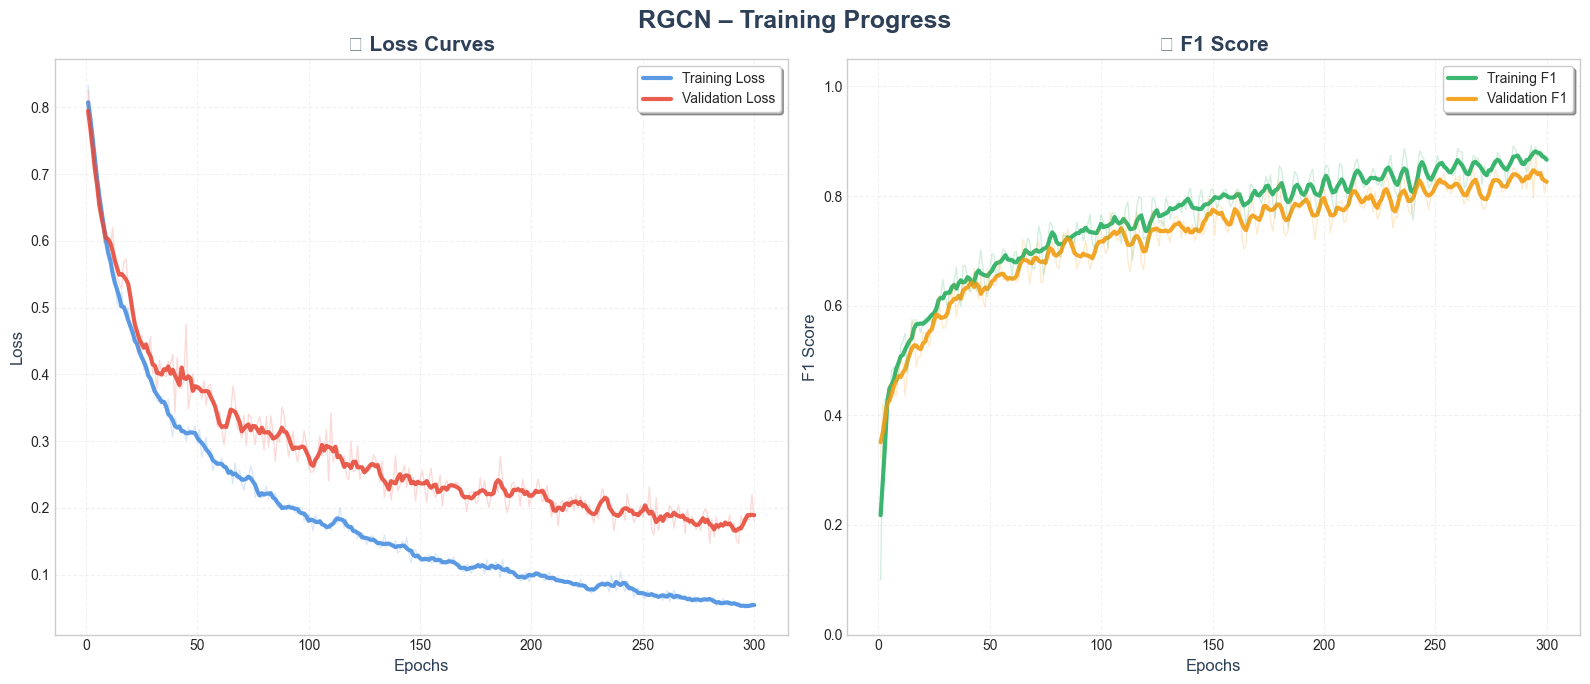

📊 RGCN Training Summary
🔁 Epochs: 300
🏆 Best Training F1: 0.8928
🏆 Best Validation F1: 0.8763
📉 Final Training Loss: 0.0544
📉 Final Validation Loss: 0.1809

🚀 Processing RGAT model...


C:\Users\LOQ\AppData\Local\Temp\ipykernel_14264\3967726927.py:118: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\LOQ\AppData\Local\Temp\ipykernel_14264\3967726927.py:118: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\LOQ\AppData\Local\Temp\ipykernel_14264\3967726927.py:121: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.savefig(
C:\Users\LOQ\AppData\Local\Temp\ipykernel_14264\3967726927.py:121: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.savefig(
c:\Users\LOQ\Desktop\Graduation\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LOQ\Desktop\Graduation\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}

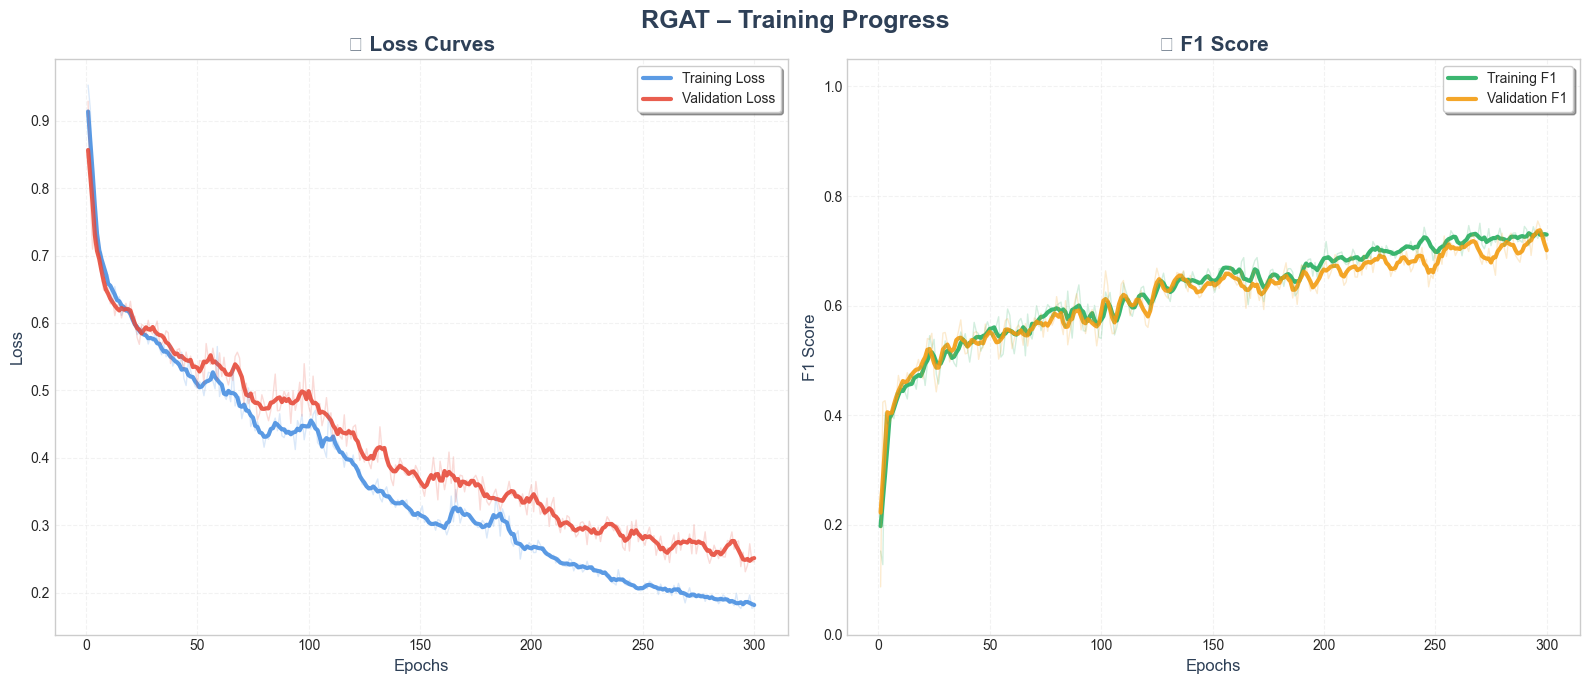

📊 RGAT Training Summary
🔁 Epochs: 300
🏆 Best Training F1: 0.7504
🏆 Best Validation F1: 0.7545
📉 Final Training Loss: 0.1787
📉 Final Validation Loss: 0.2462

✅ Learning curves visualization completed successfully.


In [63]:
# ==============================
# Plot learning curves
# ==============================
print("\n" + "=" * 70)
print("📈 Plotting Learning Curves for Trained Models")
print("=" * 70)

for model, name in [
    (rgcn_multi, "RGCN"),
    (rgat_multi, "RGAT")
]:
    try:
        print(f"\n🚀 Processing {name} model...")
        plot_learning_curves(model, name)
    except Exception as e:
        print(f"❌ Failed to plot learning curves for {name}")
        print(f"   Reason: {e}")

print("\n✅ Learning curves visualization completed successfully.")


📋 Generating Confusion Matrices for Individual Models


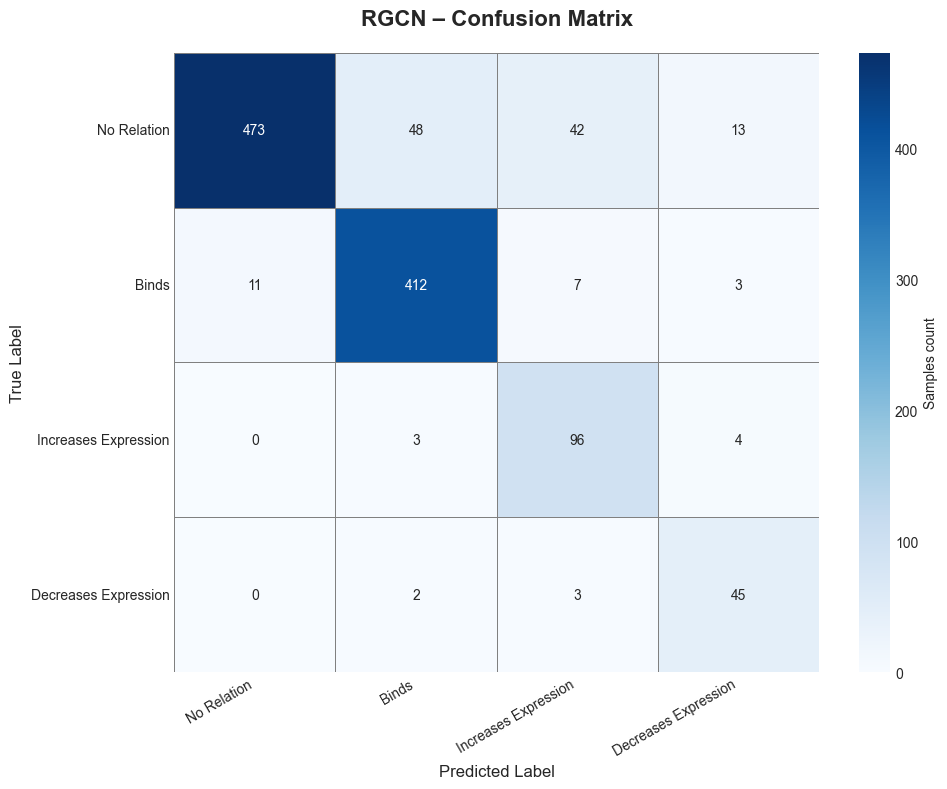


📋 Classification Report | RGCN
                      precision    recall  f1-score   support

         No Relation     0.9773    0.8212    0.8925       576
               Binds     0.8860    0.9515    0.9176       433
Increases Expression     0.6486    0.9320    0.7649       103
Decreases Expression     0.6923    0.9000    0.7826        50

            accuracy                         0.8830      1162
           macro avg     0.8011    0.9012    0.8394      1162
        weighted avg     0.9019    0.8830    0.8858      1162

🎯 Per-Class Accuracy
----------------------------------------
• No Relation           : 0.821  (473/576)
• Binds                 : 0.952  (412/433)
• Increases Expression  : 0.932  (96/103)
• Decreases Expression  : 0.900  (45/50)


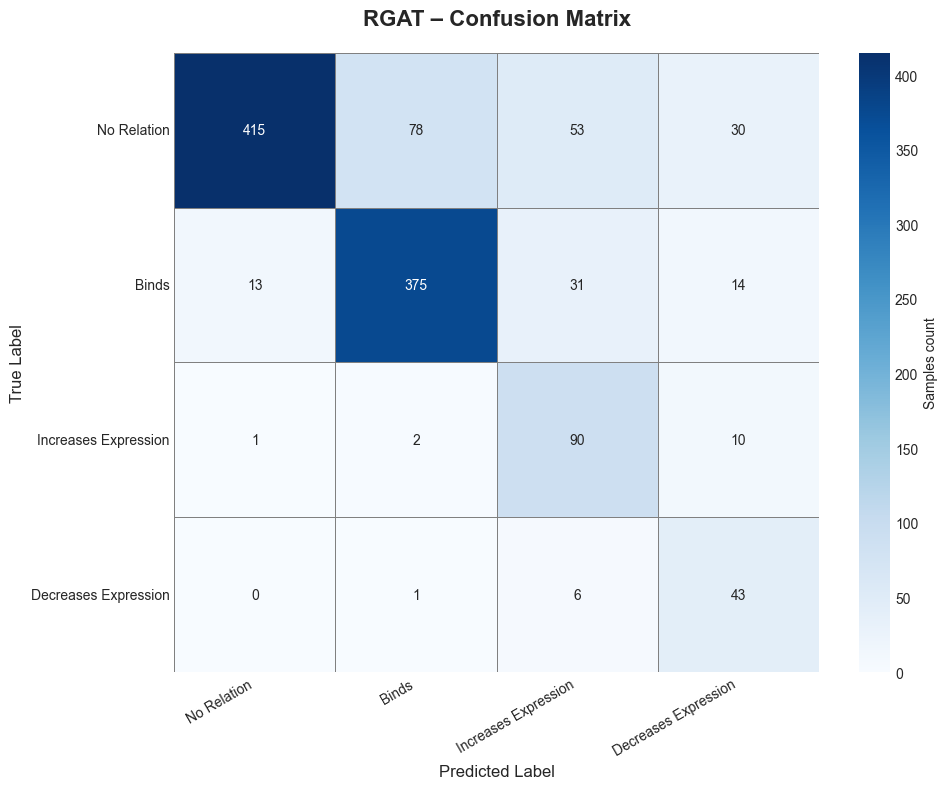


📋 Classification Report | RGAT
                      precision    recall  f1-score   support

         No Relation     0.9674    0.7205    0.8259       576
               Binds     0.8224    0.8661    0.8436       433
Increases Expression     0.5000    0.8738    0.6360       103
Decreases Expression     0.4433    0.8600    0.5850        50

            accuracy                         0.7943      1162
           macro avg     0.6833    0.8301    0.7226      1162
        weighted avg     0.8494    0.7943    0.8053      1162

🎯 Per-Class Accuracy
----------------------------------------
• No Relation           : 0.720  (415/576)
• Binds                 : 0.866  (375/433)
• Increases Expression  : 0.874  (90/103)
• Decreases Expression  : 0.860  (43/50)


In [64]:
# ==============================
# Confusion Matrices for Individual Models
# ==============================
print("\n" + "="*70)
print("📋 Generating Confusion Matrices for Individual Models")
print("="*70)

# RGCN Confusion Matrix
cm_rgcn = plot_confusion_matrix(
    rgcn_multi,
    data,
    test_edges_tensor,
    y_test_tensor,
    model_name="RGCN"
)

# RGAT Confusion Matrix
cm_rgat = plot_confusion_matrix(
    rgat_multi,
    data,
    test_edges_tensor,
    y_test_tensor,
    model_name="RGAT"
)

In [65]:
import torch
import torch.nn.functional as F
from sklearn.metrics import classification_report, accuracy_score

# ==============================
# Ensemble Confusion Matrix
# ==============================
print("\n" + "=" * 70)
print("🤝 Creating Ensemble classification report (RGCN + RGAT)")
print("=" * 70)

def tuned_ensemble_evaluation(rgcn, rgat, data, edge_pairs, labels, threshold=0.75):
    rgcn.eval()
    rgat.eval()
    
    with torch.no_grad():
        h_rgcn = rgcn.encode(data.x, data.edge_index, data.edge_type)
        h_rgat = rgat.encode(data.x, data.edge_index, data.edge_type)
        
        probs_rgcn = F.softmax(rgcn.decode(h_rgcn, edge_pairs), dim=1)
        probs_rgat = F.softmax(rgat.decode(h_rgat, edge_pairs), dim=1)
        
        final_probs = (0.7 * probs_rgcn) + (0.3 * probs_rgat)

        raw_preds = torch.argmax(final_probs, dim=1)
        confidences, _ = torch.max(final_probs, dim=1)
        
        tuned_preds = raw_preds.clone()
        
        for i in range(len(tuned_preds)):

            if tuned_preds[i] in [2, 3] and confidences[i] < threshold:
                tuned_preds[i] = 0

        y_true = labels.cpu().numpy()
        y_pred = tuned_preds.cpu().numpy()
        
        target_names = ['No Relation', 'Binds', 'Increases Expression', 'Decreases Expression']
        print(classification_report(y_true, y_pred, target_names=target_names))
        
        return final_probs, tuned_preds


final_probs, final_preds = tuned_ensemble_evaluation(
    rgcn_multi, rgat_multi, data, 
    test_edges_tensor, y_test_tensor, 
    #threshold=0.70  
)


🤝 Creating Ensemble classification report (RGCN + RGAT)
                      precision    recall  f1-score   support

         No Relation       0.94      0.89      0.91       576
               Binds       0.89      0.95      0.92       433
Increases Expression       0.83      0.82      0.82       103
Decreases Expression       0.81      0.84      0.82        50

            accuracy                           0.90      1162
           macro avg       0.87      0.87      0.87      1162
        weighted avg       0.90      0.90      0.90      1162




🤝 Creating Ensemble Confusion Matrix (RGCN + RGAT)


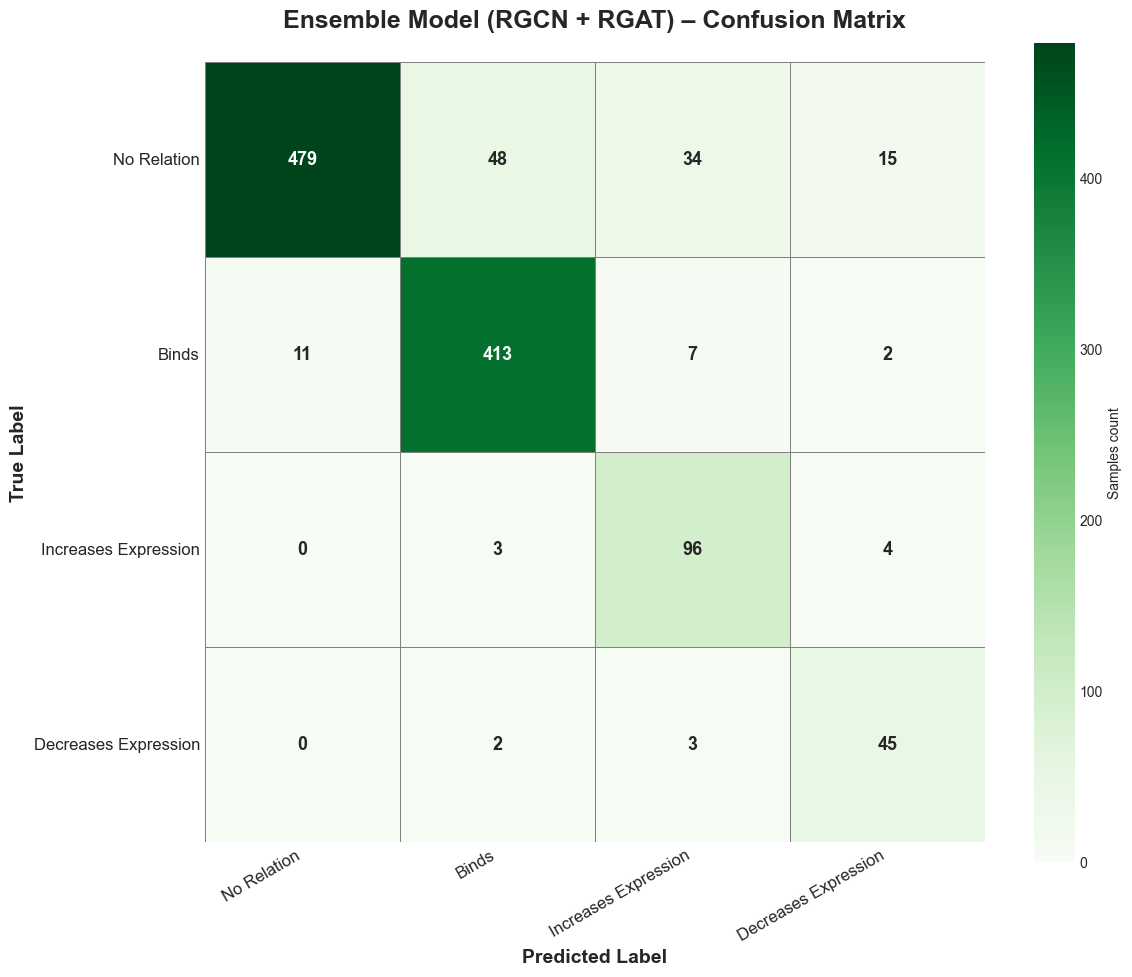


📊 Ensemble Model Performance Summary
---------------------------------------------
🏆 Overall Accuracy : 0.8890 (88.90%)

🎯 Per-Class Accuracy
• No Relation           : 0.832 (479/576)
• Binds                 : 0.954 (413/433)
• Increases Expression  : 0.932 (96/103)
• Decreases Expression  : 0.900 (45/50)
✅ Ensemble confusion matrix generated successfully.


In [66]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# ==============================
# Ensemble Confusion Matrix
# ==============================
print("\n" + "=" * 70)
print("🤝 Creating Ensemble Confusion Matrix (RGCN + RGAT)")
print("=" * 70)

rgcn_multi.eval()
rgat_multi.eval()

with torch.no_grad():
    # ---- Encode ----
    h_rgcn = rgcn_multi.encode(data.x, data.edge_index, data.edge_type)
    h_rgat = rgat_multi.encode(data.x, data.edge_index, data.edge_type)

    # ---- Decode ----
    logits_rgcn = rgcn_multi.decode(h_rgcn, test_edges_tensor)
    logits_rgat = rgat_multi.decode(h_rgat, test_edges_tensor)

    # ---- Softmax probabilities ----
    probs_rgcn = F.softmax(logits_rgcn, dim=1)
    probs_rgat = F.softmax(logits_rgat, dim=1)

    # ---- Weighted ensemble ----
    final_probs = (0.7 * probs_rgcn) + (0.3 * probs_rgat)

    ensemble_predictions = torch.argmax(final_probs, dim=1).cpu().numpy()
    true_labels = y_test_tensor.cpu().numpy()

if len(ensemble_predictions) != len(true_labels):
    raise ValueError("❌ Ensemble predictions and true labels size mismatch")

# ==============================
# Confusion Matrix
# ==============================
class_names = [
    "No Relation",
    "Binds",
    "Increases Expression",
    "Decreases Expression"
]

cm_ensemble = confusion_matrix(true_labels, ensemble_predictions)

# ==============================
# Plot
# ==============================
plt.figure(figsize=(12, 10))

sns.heatmap(
    cm_ensemble,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=class_names,
    yticklabels=class_names,
    square=True,
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={"label": "Samples count"},
    annot_kws={"size": 13, "weight": "bold"}
)

plt.title(
    "Ensemble Model (RGCN + RGAT) – Confusion Matrix",
    fontsize=18,
    fontweight="bold",
    pad=25
)
plt.xlabel("Predicted Label", fontsize=14, fontweight="bold")
plt.ylabel("True Label", fontsize=14, fontweight="bold")
plt.xticks(rotation=30, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.savefig(
    "Ensemble_confusion_matrix.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

# ==============================
# Statistics
# ==============================
ensemble_accuracy = np.trace(cm_ensemble) / np.sum(cm_ensemble)

print("\n📊 Ensemble Model Performance Summary")
print("-" * 45)
print(f"🏆 Overall Accuracy : {ensemble_accuracy:.4f} ({ensemble_accuracy * 100:.2f}%)")

class_accuracies = np.divide(
    cm_ensemble.diagonal(),
    cm_ensemble.sum(axis=1),
    out=np.zeros_like(cm_ensemble.diagonal(), dtype=float),
    where=cm_ensemble.sum(axis=1) != 0
)

print("\n🎯 Per-Class Accuracy")
for name, acc, correct, total in zip(
    class_names,
    class_accuracies,
    cm_ensemble.diagonal(),
    cm_ensemble.sum(axis=1)
):
    print(f"• {name:<22}: {acc:.3f} ({correct}/{total})")

print("=" * 70)
print("✅ Ensemble confusion matrix generated successfully.")

In [67]:
# ==============================
# Comprehensive Model Comparison
# ==============================
print("\n" + "=" * 70)
print("🏆 Comprehensive Performance Comparison")
print("=" * 70)

# ==============================
# Overall Accuracy
# ==============================
rgcn_accuracy = np.trace(cm_rgcn) / np.sum(cm_rgcn) if np.sum(cm_rgcn) > 0 else 0.0
rgat_accuracy = np.trace(cm_rgat) / np.sum(cm_rgat) if np.sum(cm_rgat) > 0 else 0.0
ensemble_accuracy = np.trace(cm_ensemble) / np.sum(cm_ensemble) if np.sum(cm_ensemble) > 0 else 0.0

print("\n📊 Overall Accuracy")
print("-" * 40)
print(f"• RGCN Model     : {rgcn_accuracy:.4f} ({rgcn_accuracy * 100:.2f}%)")
print(f"• RGAT Model     : {rgat_accuracy:.4f} ({rgat_accuracy * 100:.2f}%)")
print(f"• Ensemble Model : {ensemble_accuracy:.4f} ({ensemble_accuracy * 100:.2f}%)")

# ==============================
# Best Model Selection
# ==============================
best_model = max(
    {
        "RGCN": rgcn_accuracy,
        "RGAT": rgat_accuracy,
        "Ensemble": ensemble_accuracy
    },
    key=lambda x: {
        "RGCN": rgcn_accuracy,
        "RGAT": rgat_accuracy,
        "Ensemble": ensemble_accuracy
    }[x]
)

print("\n🥇 Best Performing Model")
print("-" * 40)
print(f"🏆 {best_model}")

# ==============================
# Per-Class Accuracy
# ==============================
print("\n📈 Per-Class Performance")
print("-" * 40)

for i, class_name in enumerate(class_names):
    rgcn_total = cm_rgcn[i].sum()
    rgat_total = cm_rgat[i].sum()
    ensemble_total = cm_ensemble[i].sum()

    rgcn_class_acc = cm_rgcn[i, i] / rgcn_total if rgcn_total > 0 else 0.0
    rgat_class_acc = cm_rgat[i, i] / rgat_total if rgat_total > 0 else 0.0
    ensemble_class_acc = cm_ensemble[i, i] / ensemble_total if ensemble_total > 0 else 0.0

    print(f"\n🔹 {class_name}")
    print(f"   • RGCN     : {rgcn_class_acc:.3f}")
    print(f"   • RGAT     : {rgat_class_acc:.3f}")
    print(f"   • Ensemble : {ensemble_class_acc:.3f}")

# ==============================
# Saved Artifacts
# ==============================
print("\n💾 Generated Files")
print("-" * 40)
print("• RGCN_learning_curves.png")
print("• RGAT_learning_curves.png")
print("• RGCN_confusion_matrix.png")
print("• RGAT_confusion_matrix.png")
print("• Ensemble_confusion_matrix.png")

print("\n" + "=" * 70)
print("✅ Model comparison completed successfully.")


🏆 Comprehensive Performance Comparison

📊 Overall Accuracy
----------------------------------------
• RGCN Model     : 0.8830 (88.30%)
• RGAT Model     : 0.7943 (79.43%)
• Ensemble Model : 0.8890 (88.90%)

🥇 Best Performing Model
----------------------------------------
🏆 Ensemble

📈 Per-Class Performance
----------------------------------------

🔹 No Relation
   • RGCN     : 0.821
   • RGAT     : 0.720
   • Ensemble : 0.832

🔹 Binds
   • RGCN     : 0.952
   • RGAT     : 0.866
   • Ensemble : 0.954

🔹 Increases Expression
   • RGCN     : 0.932
   • RGAT     : 0.874
   • Ensemble : 0.932

🔹 Decreases Expression
   • RGCN     : 0.900
   • RGAT     : 0.860
   • Ensemble : 0.900

💾 Generated Files
----------------------------------------
• RGCN_learning_curves.png
• RGAT_learning_curves.png
• RGCN_confusion_matrix.png
• RGAT_confusion_matrix.png
• Ensemble_confusion_matrix.png

✅ Model comparison completed successfully.


In [68]:
emb_rgcn = rgcn_multi.encode(data.x, data.edge_index, data.edge_type).detach().cpu()
emb_rgat = rgat_multi.encode(data.x, data.edge_index, data.edge_type).detach().cpu()
final_emb = torch.cat([emb_rgcn, emb_rgat], dim=1)

import pandas as pd
df_final_embeddings = pd.DataFrame(final_emb.numpy(), index=df_features["nodeID"])
df_final_embeddings.to_csv(r"C:\Users\LOQ\Desktop\Graduation\alz_final_multiclass_embeddings.csv")

print("✔ Final Multi-Class embeddings saved successfully!")

#save the weights of the models
torch.save(rgcn_multi.state_dict(), r"C:\Users\LOQ\Desktop\Graduation\rgcn_multi.pt")
torch.save(rgat_multi.state_dict(), r"C:\Users\LOQ\Desktop\Graduation\rgat_multi.pt")
print("✔ Final weights saved successfully!")


✔ Final Multi-Class embeddings saved successfully!
✔ Final weights saved successfully!


# **📌 Phase 4 _ Link with LLM**


In [69]:
import pandas as pd
import json
import torch
import torch.nn.functional as F

device = data.x.device
emb_rgcn = rgcn_multi.encode(data.x, data.edge_index, data.edge_type).detach()
emb_rgat = rgat_multi.encode(data.x, data.edge_index, data.edge_type).detach()
final_emb = torch.cat([emb_rgcn, emb_rgat], dim=1)

logits_rgcn = rgcn_multi.decode(emb_rgcn, test_edges_tensor)
logits_rgat = rgat_multi.decode(emb_rgat, test_edges_tensor)

# دمج النتائج (متوسط)
logits_test = (logits_rgcn + logits_rgat) / 2
probs_test = F.softmax(logits_test, dim=1).detach().cpu().numpy()
preds_test = torch.argmax(logits_test, dim=1).detach().cpu().numpy()

# بناء صفوف التفسير
rows = []
target_names = ['No Relation', 'Binds', 'Increases Expression', 'Decreases Expression']

for i, (d_idx, g_idx) in enumerate(test_edges_tensor.cpu().numpy()):
    rows.append({
        "drug_node": df_features["nodeID"][d_idx],
        "gene_node": df_features["nodeID"][g_idx],
        "true_label": int(y_test_tensor[i].cpu().item()),
        "predicted_label": int(preds_test[i]),
        "predicted_type": target_names[int(preds_test[i])],
        "probabilities": probs_test[i].tolist(),
        "drug_embedding": final_emb[d_idx].detach().cpu().numpy().tolist(),
        "gene_embedding": final_emb[g_idx].detach().cpu().numpy().tolist(),
    })

# حفظ ملف JSON
with open("alz_multiclass_interpretation.json", "w") as f:
    json.dump(rows, f, indent=2)

print("✔ Multi-class Interpretation dataset saved → alz_multiclass_interpretation.json")
print("Total test samples processed:", len(rows))

✔ Multi-class Interpretation dataset saved → alz_multiclass_interpretation.json
Total test samples processed: 1162


In [72]:
# ========================================
# SIMPLIFIED ALZHEIMER'S LLM ANALYSIS
# Following the interface approach with focused analysis
# ========================================

import pandas as pd
import json
import time
import os
from datetime import datetime
import numpy as np
import google.generativeai as genai
import random
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')

# Load environment variables
load_dotenv()

# ========================================
# STEP 1: DEFINE CLASS NAMES (SAME AS INTERFACE)
# ========================================

CLASS_NAMES = [
    "NO_LINK",
    "CHEMICALBINDSGENE",
    "CHEMICALINCREASESEXPRESSION",
    "CHEMICALDECREASESEXPRESSION"
]

print("🔄 Setting up enhanced LLM analysis...")

# ========================================
# STEP 2: GEMINI MODELS CONFIGURATION
# ========================================

# ALL available working models (complete list from API check)
AVAILABLE_GEMINI_MODELS = [
    "models/gemini-2.5-flash",
    "models/gemini-2.5-pro", 
    "models/gemini-2.0-flash-exp",
    "models/gemini-2.0-flash",
    "models/gemini-2.0-flash-001",
    "models/gemini-2.0-flash-lite-001",
    "models/gemini-2.0-flash-lite",
    "models/gemini-exp-1206",
    "models/gemini-flash-latest",
    "models/gemini-flash-lite-latest", 
    "models/gemini-pro-latest",
    "models/gemini-2.5-flash-lite",
    "models/gemini-3-pro-preview",
    "models/gemini-3-flash-preview"
]

# Get API key from environment
GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')
if not GEMINI_API_KEY:
    print("❌ Warning: No Gemini API key found in .env file")
else:
    print("✅ Gemini API key loaded successfully")
    genai.configure(api_key=GEMINI_API_KEY)

# ========================================
# STEP 3: CREATE METADATA EXTRACTION FUNCTIONS
# ========================================

def get_drug_metadata(drug_id):
    """Extract drug information from AlzKB"""
    try:
        query = f"""
        MATCH (d:Drug {{nodeID: '{drug_id}'}})
        OPTIONAL MATCH (d)-[:DRUGINCLASS]-(dc:DrugClass)
        RETURN d.commonName as name, collect(DISTINCT dc.className) as classes
        LIMIT 1
        """
        
        result = list(mg.execute_and_fetch(query))
        if result:
            r = result[0]
            return {
                "name": r.get("name", f"Drug_{drug_id}"),
                "classes": [c for c in r.get("classes", []) if c]
            }
    except Exception:
        pass
    
    return {"name": f"Drug_{drug_id}", "classes": []}

def get_gene_metadata(gene_id):
    """Extract gene information from AlzKB"""
    try:
        query = f"""
        MATCH (g:Gene {{nodeID: '{gene_id}'}})
        OPTIONAL MATCH (g)-[:GENEPARTICIPATESINBIOLOGICALPROCESS]-(bp:BiologicalProcess)
        OPTIONAL MATCH (g)-[:GENEHASMOLECULARFUNCTION]-(mf:MolecularFunction)
        OPTIONAL MATCH (g)-[:GENEASSOCIATEDWITHCELLULARCOMPONENT]-(cc:CellularComponent)
        RETURN g.geneSymbol as symbol, g.geneName as name,
               collect(DISTINCT bp.processName) as biological_processes,
               collect(DISTINCT mf.functionName) as molecular_functions,
               collect(DISTINCT cc.componentName) as cellular_components
        LIMIT 1
        """
        
        result = list(mg.execute_and_fetch(query))
        if result:
            r = result[0]
            symbol = r.get("symbol", "")
            name = r.get("name", "")
            final_name = symbol or name or f"Gene_{gene_id}"
            
            return {
                "symbol": final_name,
                "biological_processes": [bp for bp in r.get("biological_processes", []) if bp],
                "molecular_functions": [mf for mf in r.get("molecular_functions", []) if mf],
                "cellular_components": [cc for cc in r.get("cellular_components", []) if cc]
            }
    except Exception:
        pass
    
    return {
        "symbol": f"Gene_{gene_id}",
        "biological_processes": [],
        "molecular_functions": [],
        "cellular_components": []
    }

# ========================================
# STEP 4: ENHANCED LLM FUNCTION (UPDATED)
# ========================================

def get_advanced_explanation(
        drug_name, drug_id, gene_name, gene_id,
        class_id, class_prob,
        drug_emb, gene_emb,
        drug_metadata_dict, gene_metadata_dict,
        lang="English"):
    """Generate explanation using Gemini with improved academic framing"""
    
    relation_name = CLASS_NAMES[class_id]
    
    # Extract metadata (removed pathways)
    drug_classes = ", ".join(drug_metadata_dict.get("classes", [])) or "No known drug classes"
    
    bp = ", ".join(gene_metadata_dict.get("biological_processes", [])) or "No known biological processes"
    mf = ", ".join(gene_metadata_dict.get("molecular_functions", [])) or "No known molecular functions"
    cc = ", ".join(gene_metadata_dict.get("cellular_components", [])) or "No known cellular components"
    
    emb_summary = f"Drug Vector Start: {drug_emb[:3]}... Gene Vector Start: {gene_emb[:3]}..."
    
    # Set language
    llm_lang = "Arabic" if lang == "العربية" else "English"
    
    # Updated prompt (removed pathways, improved academic framing)
    prompt = f"""
You are an expert biomedical AI explainer specializing in Alzheimer's disease research.

CRITICAL INSTRUCTIONS FOR ACADEMIC FRAMING:
1. Use cautious, academic language that distinguishes between computational predictions and biological validation
2. In Arabic, use "النموذج يشير إلى" (the model indicates) instead of "من المحتمل أن" (it is likely that)
3. Emphasize that this is a computational prediction requiring experimental validation
4. Use "بناءً على البيانات المتاحة" once at the beginning, avoid excessive repetition

Your task is to explain the predicted relationship between a drug and a gene
using biological metadata, drug classes, gene functions, and embedding similarity.

DRUG INFORMATION:
Drug Name: {drug_name}
Drug ID: {drug_id}
Drug Classes: {drug_classes}

GENE INFORMATION:
Gene Name: {gene_name}
Gene ID: {gene_id}
Biological Processes: {bp}
Molecular Functions: {mf}
Cellular Components: {cc}

MODEL PREDICTION:
Predicted Relation Type: {relation_name}
Confidence Score: {class_prob:.4f}
Embedding Similarity: {emb_summary}

TASK:
Write a scientifically rigorous explanation (6-8 sentences) that:
1. Starts with methodological context (computational prediction)
2. Explains the predicted relationship using available drug classes and gene functions
3. Uses cautious language about biological plausibility
4. Discusses embedding similarity as computational evidence
5. Concludes with the need for experimental validation

LANGUAGE REQUIREMENTS:
- Write entirely in: {llm_lang}
- Use academic, cautious phrasing moderately (avoid excessive repetition)
- Base analysis ONLY on provided metadata
- If information is missing, state this explicitly

EXAMPLE CAUTIOUS PHRASES (Arabic):
- "بناءً على البيانات المتاحة..." (use once at beginning)
- "النموذج الحاسوبي يشير إلى..."
- "الإشارة الحاسوبية تقترح..."
- "تتطلب هذه النتائج التحقق التجريبي..." (use once at end)

IMPORTANT ACADEMIC NOTE:
Provide a methodologically sound analysis that clearly distinguishes between computational predictions and established biological knowledge, emphasizing the preliminary nature of these findings.

IMPORTANT RESTRICTION:
You must base your explanation ONLY on the information explicitly provided above.
Do NOT use any external biological knowledge, assumptions, or facts that are not included in the metadata or prediction context.
If information is missing, acknowledge it instead of inventing details.
Your entire explanation must be written in: {llm_lang}.
"""
    
    # Check if API key is available
    if not GEMINI_API_KEY:
        return "❌ Gemini API Key not found. Please add GEMINI_API_KEY to your .env file."
    
    # Try working models in order
    for model_name in AVAILABLE_GEMINI_MODELS:
        try:
            model = genai.GenerativeModel(model_name)
            response = model.generate_content(prompt)
            return response.text
        except Exception:
            continue
    
    return f"❌ جميع نماذج Gemini فشلت. تحقق من مفتاح API والاتصال بالإنترنت."

# ========================================
# STEP 5: PREPARE TEST DATA FOR ANALYSIS
# ========================================

# Generate embeddings
device = data.x.device
with torch.no_grad():
    emb_rgcn = rgcn_multi.encode(data.x, data.edge_index, data.edge_type).detach()
    emb_rgat = rgat_multi.encode(data.x, data.edge_index, data.edge_type).detach()
    final_emb = torch.cat([emb_rgcn, emb_rgat], dim=1)

# Generate predictions using ensemble
logits_rgcn = rgcn_multi.decode(emb_rgcn, test_edges_tensor)
logits_rgat = rgat_multi.decode(emb_rgat, test_edges_tensor)

# Use same ensemble weights as interface: 0.7 * RGCN + 0.3 * RGAT
logits_test = 0.7 * logits_rgcn + 0.3 * logits_rgat
probs_test = F.softmax(logits_test, dim=1).detach().cpu().numpy()
preds_test = torch.argmax(logits_test, dim=1).detach().cpu().numpy()

# ========================================
# STEP 6: CREATE BASIC PREDICTIONS DATAFRAME
# ========================================

basic_predictions = []
for i, (d_idx, g_idx) in enumerate(test_edges_tensor.cpu().numpy()):
    drug_node_id = df_features["nodeID"].iloc[d_idx]
    gene_node_id = df_features["nodeID"].iloc[g_idx]
    
    basic_predictions.append({
        "drug_node": drug_node_id,
        "gene_node": gene_node_id,
        "predicted_class_id": int(preds_test[i]),
        "predicted_class_name": CLASS_NAMES[int(preds_test[i])],
        "confidence": float(probs_test[i][preds_test[i]]),
        "all_probabilities": probs_test[i].tolist(),
        "drug_embedding": final_emb[d_idx].detach().cpu().numpy().tolist(),
        "gene_embedding": final_emb[g_idx].detach().cpu().numpy().tolist()
    })

df_basic = pd.DataFrame(basic_predictions)

# ========================================
# STEP 7: ENHANCED ANALYSIS WITH GEMINI
# ========================================

SAMPLE_SIZE = 10  # Reduced sample size
LANGUAGE = "English"

# Select sample for analysis
sample_df = df_basic[df_basic['predicted_class_name'] != 'NO_LINK'].head(SAMPLE_SIZE)
if len(sample_df) < SAMPLE_SIZE:
    remaining = df_basic[df_basic['predicted_class_name'] == 'NO_LINK'].head(SAMPLE_SIZE - len(sample_df))
    sample_df = pd.concat([sample_df, remaining])

print(f"📊 Analyzing {len(sample_df)} predictions with Gemini...")

# Enhanced analysis
enhanced_results = []
for idx, row in sample_df.iterrows():
    # Get metadata
    drug_meta = get_drug_metadata(row['drug_node'])
    gene_meta = get_gene_metadata(row['gene_node'])
    
    # Generate explanation
    explanation = get_advanced_explanation(
        drug_name=drug_meta['name'],
        drug_id=row['drug_node'],
        gene_name=gene_meta['symbol'],
        gene_id=row['gene_node'],
        class_id=row['predicted_class_id'],
        class_prob=row['confidence'],
        drug_emb=row['drug_embedding'],
        gene_emb=row['gene_embedding'],
        drug_metadata_dict=drug_meta,
        gene_metadata_dict=gene_meta,
        lang=LANGUAGE
    )
    
    # Combine all data (removed pathways)
    enhanced_results.append({
        "drug_node": row['drug_node'],
        "gene_node": row['gene_node'],
        "drug_name": drug_meta['name'],
        "gene_name": gene_meta['symbol'],
        "predicted_relation": row['predicted_class_name'],
        "confidence": f"{row['confidence']:.1%}",
        "drug_classes": ", ".join(drug_meta['classes']) or "No known classes",
        "biological_processes": ", ".join(gene_meta['biological_processes']) or "No known processes",
        "molecular_functions": ", ".join(gene_meta['molecular_functions']) or "No known functions",
        "cellular_components": ", ".join(gene_meta['cellular_components']) or "No known components",
        "llm_explanation": explanation,
        "all_probabilities": row['all_probabilities']
    })
    
    print(f"   ✅ Analysis {len(enhanced_results)}/{len(sample_df)} completed")
    time.sleep(1)  # Rate limiting

# ========================================
# STEP 8: SAVE RESULTS
# ========================================

# Save enhanced results
df_enhanced = pd.DataFrame(enhanced_results)
enhanced_filename = "alz_enhanced_llm_analysis.csv"
df_enhanced.to_csv(enhanced_filename, index=False)

# Save basic predictions
basic_filename = "alz_basic_predictions.csv"
df_basic.to_csv(basic_filename, index=False)

print(f"✅ Enhanced analysis completed and saved to {enhanced_filename}")
print(f"✅ Basic predictions saved to {basic_filename}")
print(f"📊 Total enhanced analyses: {len(enhanced_results)}")

🔄 Setting up enhanced LLM analysis...
✅ Gemini API key loaded successfully
📊 Analyzing 10 predictions with Gemini...
   ✅ Analysis 1/10 completed
   ✅ Analysis 2/10 completed
   ✅ Analysis 3/10 completed
   ✅ Analysis 4/10 completed
   ✅ Analysis 5/10 completed
   ✅ Analysis 6/10 completed
   ✅ Analysis 7/10 completed
   ✅ Analysis 8/10 completed
   ✅ Analysis 9/10 completed
   ✅ Analysis 10/10 completed
✅ Enhanced analysis completed and saved to alz_enhanced_llm_analysis.csv
✅ Basic predictions saved to alz_basic_predictions.csv
📊 Total enhanced analyses: 10


### التحقق من النماذج المتاحة لـ Gemini API

نظرًا لأن النموذج `gemini-1.5-flash` لم يكن متاحًا، سنقوم الآن بسرد جميع النماذج المتاحة لـ Gemini API للتحقق من النماذج التي تدعم `generateContent`.

In [77]:
import os
from dotenv import load_dotenv
import google.generativeai as genai

# Load environment variables
load_dotenv()

GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')
print("API Key available " if GEMINI_API_KEY else " No API key")

if GEMINI_API_KEY:
    genai.configure(api_key=GEMINI_API_KEY)
    
    print("\n🔍 Checking available models...")
    try:
        models = genai.list_models()
        
        print("📋 Available models:")
        available_models = []
        for model in models:
            if 'generateContent' in model.supported_generation_methods:
                print(f"   ✅ {model.name}")
                available_models.append(model.name)
            else:
                print(f"   ❌ {model.name} (no generateContent support)")
        
        print(f"\n🎯 Found {len(available_models)} compatible models")
        
        # Test the first available model
        if available_models:
            test_model_name = available_models[19]
            print(f"\n🧪 Testing model: {test_model_name}")
            
            try:
                model = genai.GenerativeModel(test_model_name)
                response = model.generate_content("Hello, this is a test.")
                print(f"✅ SUCCESS! Model {test_model_name} works!")
                print(f"Response: {response.text}")
                
                # Save working model name
                with open("working_model.txt", "w") as f:
                    f.write(test_model_name)
                print(f"💾 Saved working model name to working_model.txt")
                
            except Exception as e:
                print(f"❌ Test failed: {e}")
        else:
            print("❌ No compatible models found")
            
    except Exception as e:
        print(f"❌ Error listing models: {e}")
        print("This might be an API key issue or network problem")
else:
    print("❌ No API key found")

API Key available 

🔍 Checking available models...
📋 Available models:
   ❌ models/embedding-gecko-001 (no generateContent support)
   ✅ models/gemini-2.5-flash
   ✅ models/gemini-2.5-pro
   ✅ models/gemini-2.0-flash-exp
   ✅ models/gemini-2.0-flash
   ✅ models/gemini-2.0-flash-001
   ✅ models/gemini-2.0-flash-lite-001
   ✅ models/gemini-2.0-flash-lite
   ✅ models/gemini-2.0-flash-lite-preview-02-05
   ✅ models/gemini-2.0-flash-lite-preview
   ✅ models/gemini-exp-1206
   ✅ models/gemini-2.5-flash-preview-tts
   ✅ models/gemini-2.5-pro-preview-tts
   ✅ models/gemma-3-1b-it
   ✅ models/gemma-3-4b-it
   ✅ models/gemma-3-12b-it
   ✅ models/gemma-3-27b-it
   ✅ models/gemma-3n-e4b-it
   ✅ models/gemma-3n-e2b-it
   ✅ models/gemini-flash-latest
   ✅ models/gemini-flash-lite-latest
   ✅ models/gemini-pro-latest
   ✅ models/gemini-2.5-flash-lite
   ✅ models/gemini-2.5-flash-image-preview
   ✅ models/gemini-2.5-flash-image
   ✅ models/gemini-2.5-flash-preview-09-2025
   ✅ models/gemini-2.5-flash-

# 🔧 CORRECTED Metadata Extraction with Proper Relationship Names

The previous metadata extraction used incorrect relationship names. This cell uses the correct ones:
- `[:DRUGINCLASS]` instead of `[:HAS_CLASS]`
- `[:GENEPARTICIPATESINBIOLOGICALPROCESS]` instead of `[:INVOLVED_IN_BP]`
- `[:GENEHASMOLECULARFUNCTION]` instead of `[:HAS_MF]`
- `[:GENEASSOCIATEDWITHCELLULARCOMPONENT]` instead of `[:LOCATED_IN]`

In [71]:
# CORRECTED Metadata Extraction - DrugClass Focus Only
import mgclient
import json
import pandas as pd
from collections import defaultdict

print("🔧 Starting CORRECTED metadata extraction...")

# Connect to Memgraph
conn = mgclient.connect(host="127.0.0.1", port=7687)
cursor = conn.cursor()
print("✅ Connected to Memgraph")

# Load drug and gene lists from subgraph
df_drugs = pd.read_csv(r"C:\Users\LOQ\Desktop\Graduation\alz_drugs_list.csv")
df_genes = pd.read_csv(r"C:\Users\LOQ\Desktop\Graduation\alz_genes_list.csv")

drug_ids = df_drugs['nodeID'].astype(str).tolist()
gene_ids = df_genes['nodeID'].astype(str).tolist()

print(f"📊 Processing {len(drug_ids)} drugs and {len(gene_ids)} genes")

# ========================================
# Extract drug metadata with CORRECT relationships
# ========================================

drug_metadata = defaultdict(dict)
print("🔍 Extracting drug metadata with CORRECT relationships...")

for i, drug_id in enumerate(drug_ids):
    if i % 200 == 0:
        print(f"  Processing drug {i+1}/{len(drug_ids)}...")
    
    try:
        # Extract drug classes with multiple properties
        cursor.execute("""
        MATCH (d:Drug {nodeID: $id})-[:DRUGINCLASS]->(c:DrugClass)
        RETURN COALESCE(c.name, c.commonName, c.className, c.nodeID) AS class_name
        """, {"id": drug_id})
        
        classes = [row[0] for row in cursor.fetchall() if row[0] is not None]
        pathways = []  # Not available in subgraph
        
        drug_metadata[drug_id] = {
            "classes": classes,
            "pathways": pathways
        }
        
    except Exception as e:
        drug_metadata[drug_id] = {"classes": [], "pathways": []}

print(f"✅ Extracted data for {len(drug_metadata)} drugs")

# Save drug metadata
with open(r"C:\Users\LOQ\Desktop\Graduation\drug_metadata.json", "w", encoding="utf-8") as f:
    json.dump(drug_metadata, f, indent=2, ensure_ascii=False)
print("💾 Updated drug_metadata.json saved")

# ========================================
# Extract gene metadata with CORRECT relationships
# ========================================

gene_metadata = defaultdict(dict)
print("🔍 Extracting gene metadata with multiple properties...")

for i, gene_id in enumerate(gene_ids):
    if i % 50 == 0:
        print(f"  Processing gene {i+1}/{len(gene_ids)}...")
    
    try:
        # Biological processes
        cursor.execute("""
        MATCH (g:Gene {nodeID: $id})-[:GENEPARTICIPATESINBIOLOGICALPROCESS]->(bp:BiologicalProcess)
        RETURN COALESCE(bp.name, bp.commonName, bp.processName, bp.nodeID) AS process_name
        """, {"id": gene_id})
        bp = [row[0] for row in cursor.fetchall() if row[0] is not None]
        
        # Molecular functions
        cursor.execute("""
        MATCH (g:Gene {nodeID: $id})-[:GENEHASMOLECULARFUNCTION]->(mf:MolecularFunction)
        RETURN COALESCE(mf.name, mf.commonName, mf.functionName, mf.nodeID) AS function_name
        """, {"id": gene_id})
        mf = [row[0] for row in cursor.fetchall() if row[0] is not None]
        
        # Cellular components
        cursor.execute("""
        MATCH (g:Gene {nodeID: $id})-[:GENEASSOCIATEDWITHCELLULARCOMPONENT]->(cc:CellularComponent)
        RETURN COALESCE(cc.name, cc.commonName, cc.componentName, cc.nodeID) AS component_name
        """, {"id": gene_id})
        cc = [row[0] for row in cursor.fetchall() if row[0] is not None]
        
        gene_metadata[gene_id] = {
            "biological_processes": bp,
            "molecular_functions": mf,
            "cellular_components": cc
        }
        
    except Exception as e:
        gene_metadata[gene_id] = {
            "biological_processes": [],
            "molecular_functions": [],
            "cellular_components": []
        }

print(f"✅ Extracted data for {len(gene_metadata)} genes")

# Save gene metadata
with open(r"C:\Users\LOQ\Desktop\Graduation\gene_metadata.json", "w", encoding="utf-8") as f:
    json.dump(gene_metadata, f, indent=2, ensure_ascii=False)
print("💾 Updated gene_metadata.json saved")

# Close connection
cursor.close()
conn.close()

print("🎉 Metadata extraction completed!")
print("📋 Summary:")
print(f"  • Drugs processed: {len(drug_metadata)}")
print(f"  • Genes processed: {len(gene_metadata)}")
print(f"  • Files updated: drug_metadata.json, gene_metadata.json")

🔧 Starting CORRECTED metadata extraction...
✅ Connected to Memgraph
📊 Processing 861 drugs and 103 genes
🔍 Extracting drug metadata with CORRECT relationships...
  Processing drug 1/861...
  Processing drug 201/861...
  Processing drug 401/861...
  Processing drug 601/861...
  Processing drug 801/861...
✅ Extracted data for 861 drugs
💾 Updated drug_metadata.json saved
🔍 Extracting gene metadata with multiple properties...
  Processing gene 1/103...
  Processing gene 51/103...
  Processing gene 101/103...
✅ Extracted data for 103 genes
💾 Updated gene_metadata.json saved
🎉 Metadata extraction completed!
📋 Summary:
  • Drugs processed: 861
  • Genes processed: 103
  • Files updated: drug_metadata.json, gene_metadata.json
